# Exploratory Data Analysis 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from whistle_prompter import utils
from pathlib import Path
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import json

%reload_ext autoreload
%autoreload 2

In [21]:
def whistle_stats(whistles:list[np.ndarray]):
    """Get the statistics of the annotations"""
    all_times = []
    all_freqs = []
    starts = []
    ends = []
    durations = []
    n_points = []
    
    for whistle in whistles:
        times = whistle[:, 0]
        freqs = whistle[:, 1]
        all_times.append(times)
        all_freqs.append(freqs)
        start = times[0]
        end = times[-1]
        starts.append(start)
        ends.append(end)
        durations.append(end - start)
        n_points.append(len(times))

    all_times = np.concatenate(all_times)
    all_freqs = np.concatenate(all_freqs)
    durations = np.array(durations)

    print(f'Minimum time: {np.min(all_times)}')
    print(f'Maximum time: { np.max(all_times)}')
    print(f'Minimum frequency: {np.min(all_freqs)}')
    print(f'low quartile frequency: {np.quantile(all_freqs, 0.25)}')
    print(f'high quartile frequency: {np.quantile(all_freqs, 0.75)}')
    print(f'Maximum frequency: {np.max(all_freqs)}')

    print(f'Minimum duration: {np.min(durations)}')
    print(f'low quartile duration: {np.quantile(durations, 0.25)}')
    print(f'high quartile duration: {np.quantile(durations, 0.75)}')
    print(f'Maximum duration: {np.max(durations)}')
    print(f'trajectory length < 2: {np.sum(np.array(n_points) < 2)}')
    print(f'trajectory length < 5: {np.sum(np.array(n_points) < 5)}')
    print(f'trajectory length < 10: {np.sum(np.array(n_points) < 10)}')
    

    return all_times, all_freqs, starts, ends, durations



In [22]:


def plot_whistle_stats(res):
    all_times, all_freqs, starts, ends, durations = res
    # Create figure with grid layout
    fig = plt.figure(figsize=(21, 16), constrained_layout=True)
    gs = fig.add_gridspec(2, 3, height_ratios=[1.5, 2]) 
    starts = np.array(starts)
    durations = np.array(durations)
    all_freqs = np.array(all_freqs)
    all_times = np.array(all_times)
    ends = np.array(ends)
    # -------------------------------
    # 1. Start Time vs Duration Density
    # -------------------------------

    ax1 = fig.add_subplot(gs[0, 0])
    if starts.any():
        sns.histplot(starts, bins=40, kde=True, ax=ax1, color='magenta')
        q25, q50, q75 = np.percentile(starts, [25, 50, 75])
        for q, color in zip([q25, q50, q75], ['red', 'green', 'blue']):
            ax1.axvline(q, color=color, linestyle='--', linewidth=1.5)
        ax1.set_xlim(left=0)
    else:
        ax1.text(0.5, 0.5, 'No Start data', ha='center', va='center')
    ax1.set_xlabel('Start times', fontsize=12)
    ax1.set_title('Starts Distribution', fontsize=14)

    # -------------------------------
    # 2. Duration Distribution
    # -------------------------------
    ax2 = fig.add_subplot(gs[0, 1])
    if durations.any():
        sns.histplot(durations, bins=40, kde=True, ax=ax2, color='teal')
        q25, q50, q75 = np.percentile(durations, [25, 50, 75])
        for q, color in zip([q25, q50, q75], ['red', 'green', 'blue']):
            ax2.axvline(q, color=color, linestyle='--', linewidth=1.5)
    else:
        ax2.text(0.5, 0.5, 'No duration data', ha='center', va='center')
    ax2.set_xlabel('Duration', fontsize=12)
    ax2.set_title('Duration Distribution', fontsize=14)

    # -------------------------------
    # 3. Frequency Distribution
    # -------------------------------
    ax3 = fig.add_subplot(gs[0, 2])
    if all_freqs.any():
        sns.histplot(all_freqs, bins=50, kde=True, ax=ax3, color='orange')
        q25, q50, q75 = np.percentile(all_freqs, [25, 50, 75])
        for q, color in zip([q25, q50, q75], ['red', 'green', 'blue']):
            ax3.axvline(q, color=color, linestyle='--', linewidth=1.5)
    else:
        ax3.text(0.5, 0.5, 'No frequency data', ha='center', va='center')
    ax3.set_xlabel('Frequency', fontsize=12)
    ax3.set_title('Frequency Distribution', fontsize=14)

    # -------------------------------
    # 4. Time-Frequency Node Density
    # -------------------------------
    ax4 = fig.add_subplot(gs[1, :])
    if all_times.any() and all_freqs.any():
        hb = ax4.hexbin(all_times, all_freqs,
                    gridsize=50,
                    cmap='plasma',
                    bins='log',
                    mincnt=1) 
        
        # Create axes divider for integrated colorbar
        divider = make_axes_locatable(ax4)
        cax = divider.append_axes("right", size="2%", pad=0.1)
        
        # Add colorbar to the created axes
        cb4 = fig.colorbar(hb, cax=cax)
        cb4.set_label('Log-scaled Density', fontsize=10)
        ax4.set_xlim(0, all_times.max())
        ax4.set_ylim(all_freqs.min(), all_freqs.max())
    else:
        ax4.text(0.5, 0.5, 'No time-frequency data', ha='center', va='center')
    ax4.set_xlabel('Time', fontsize=12)
    ax4.set_ylabel('Frequency', fontsize=12)
    ax4.set_title('Time-Frequency Node Density', fontsize=14)

    plt.show()


Processing train data
Loaded 435 annotated whistles from Qx-Dd-SCI0608-N1-060816-142812.bin
Minimum time: 2.534497053406998
Maximum time: 238.76101639042358
Minimum frequency: 4964.960632685894
low quartile frequency: 10417.207430421617
high quartile frequency: 21945.920940637818
Maximum frequency: 47538.546255506604
Minimum duration: 0.0055248618784524695
low quartile duration: 0.06284530386740173
high quartile duration: 0.31491712707182273
Maximum duration: 1.681077348066296
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


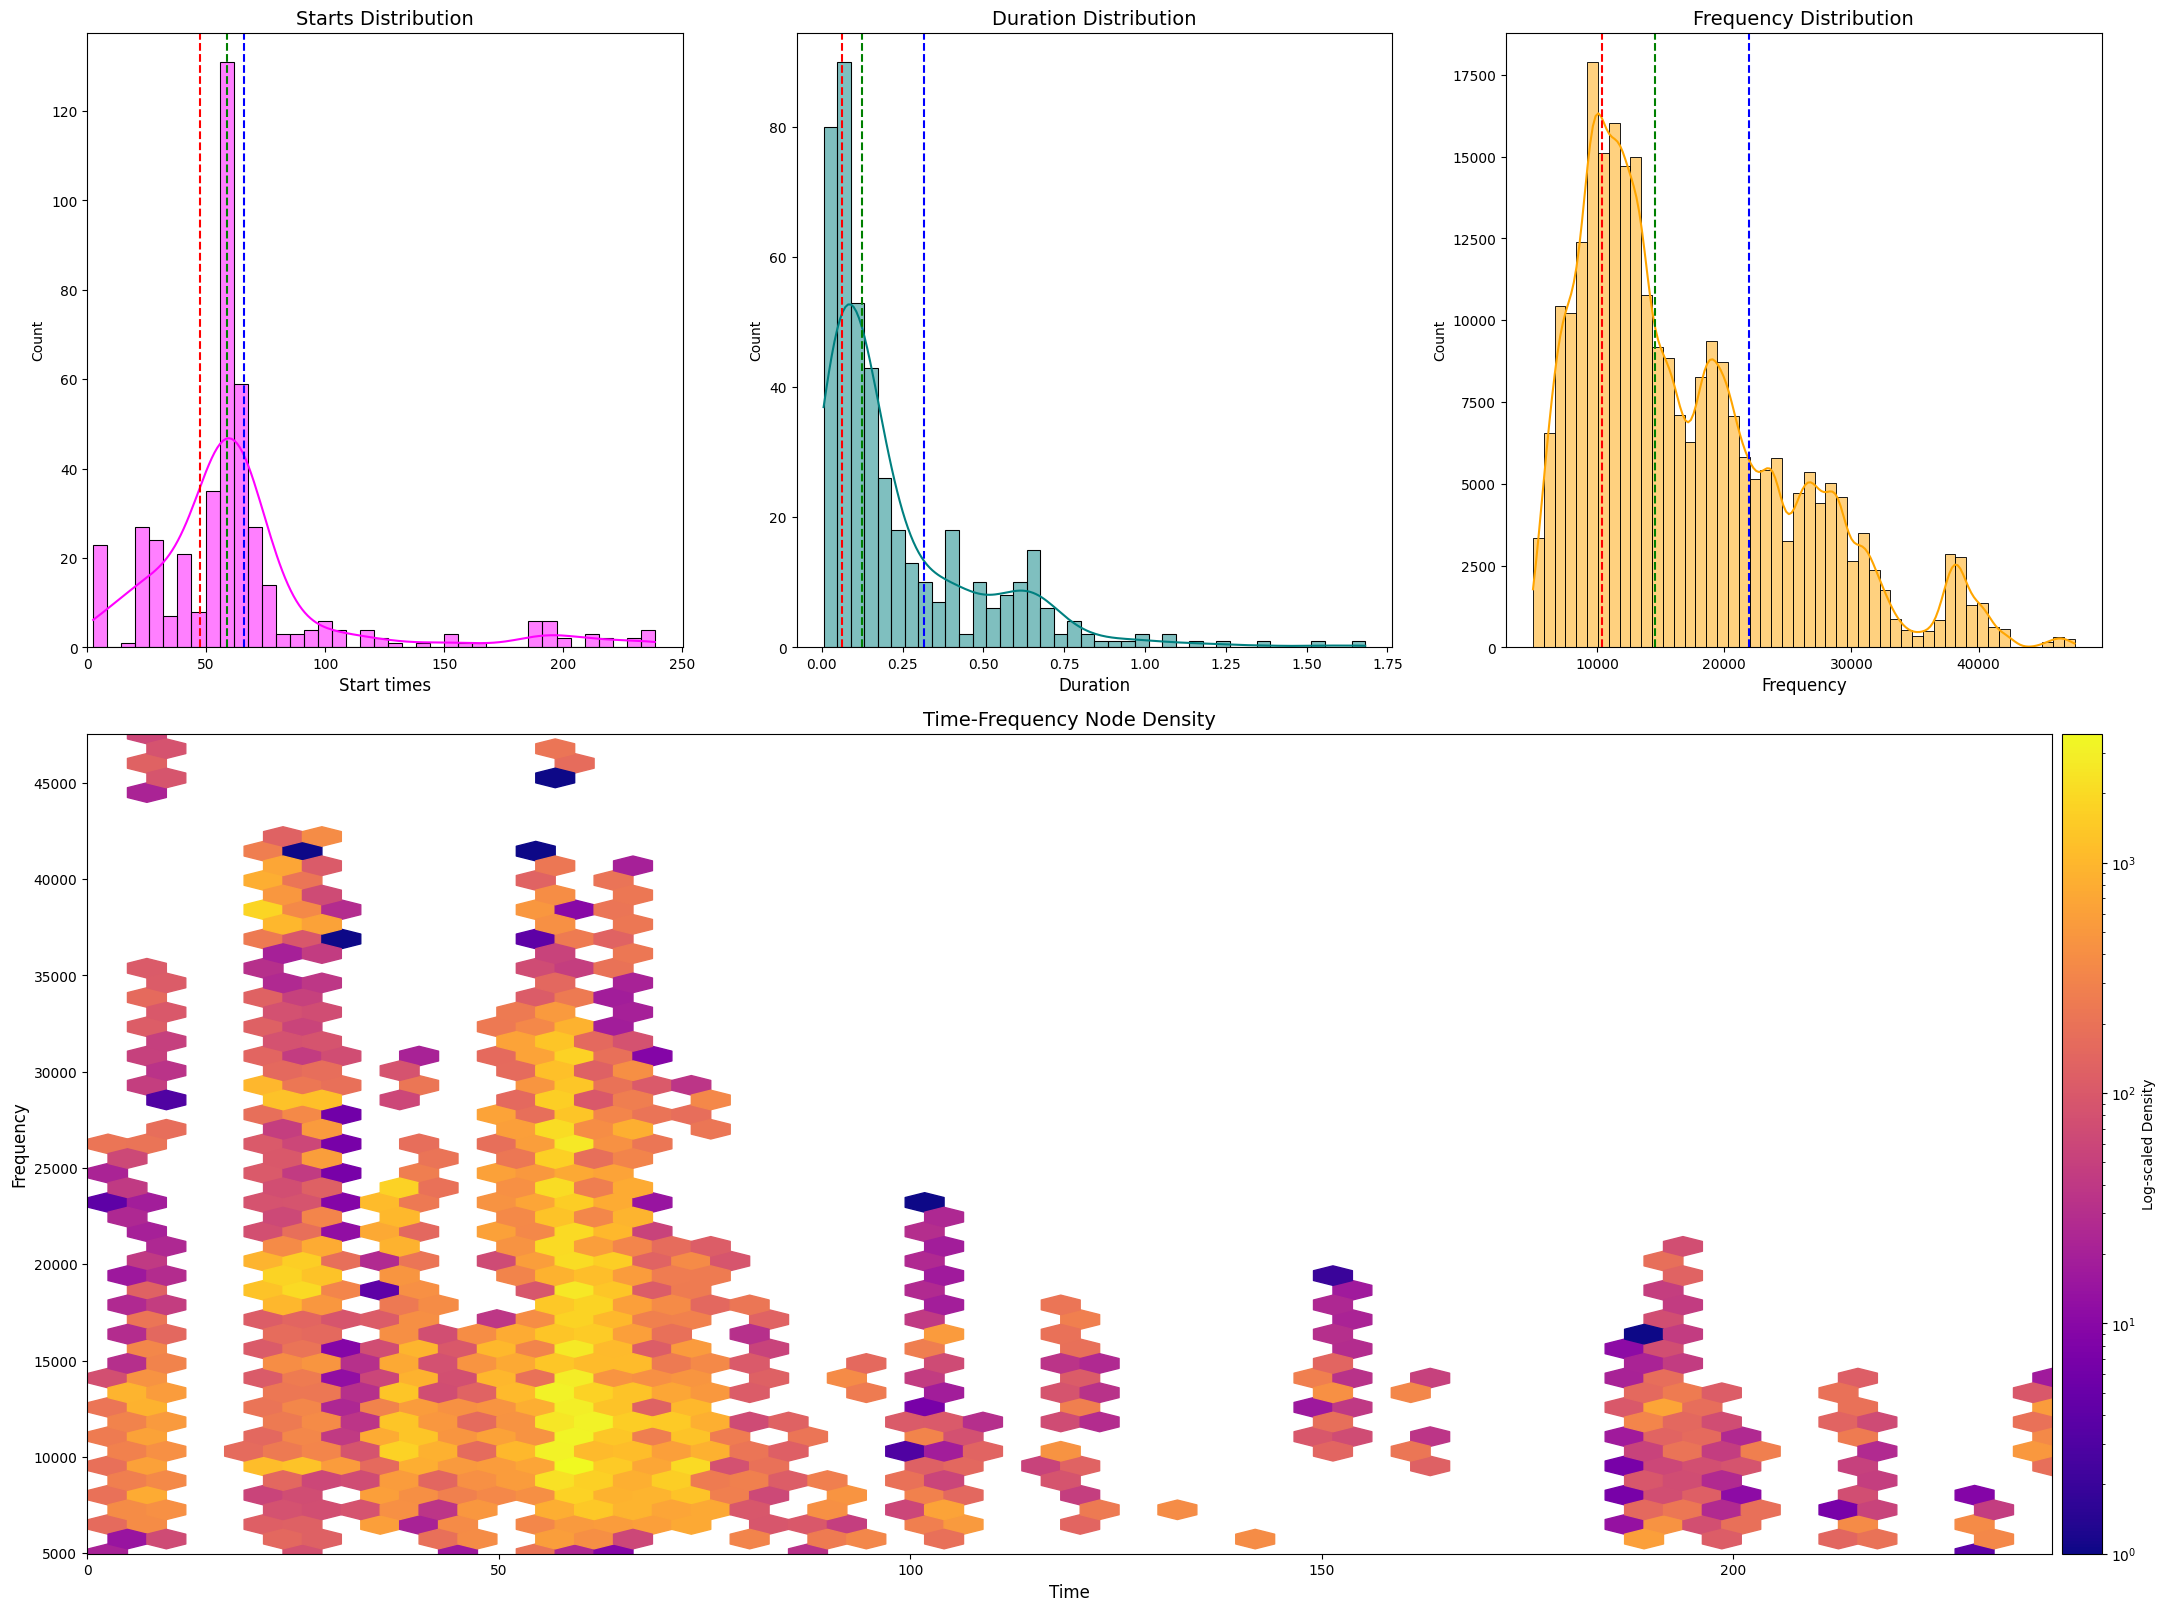

Loaded 70 annotated whistles from Qx-Tt-SCI0608-Ziph-060819-074737.bin
Minimum time: 64.48857163904236
Maximum time: 185.1082961553545
Minimum frequency: 5524.963289280464
low quartile frequency: 10721.145268661361
high quartile frequency: 16475.456494795457
Maximum frequency: 45040.3817914831
Minimum duration: 0.010359116022101489
low quartile duration: 0.1933701657458471
high quartile duration: 0.5481698895027627
Maximum duration: 1.90262430939228
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


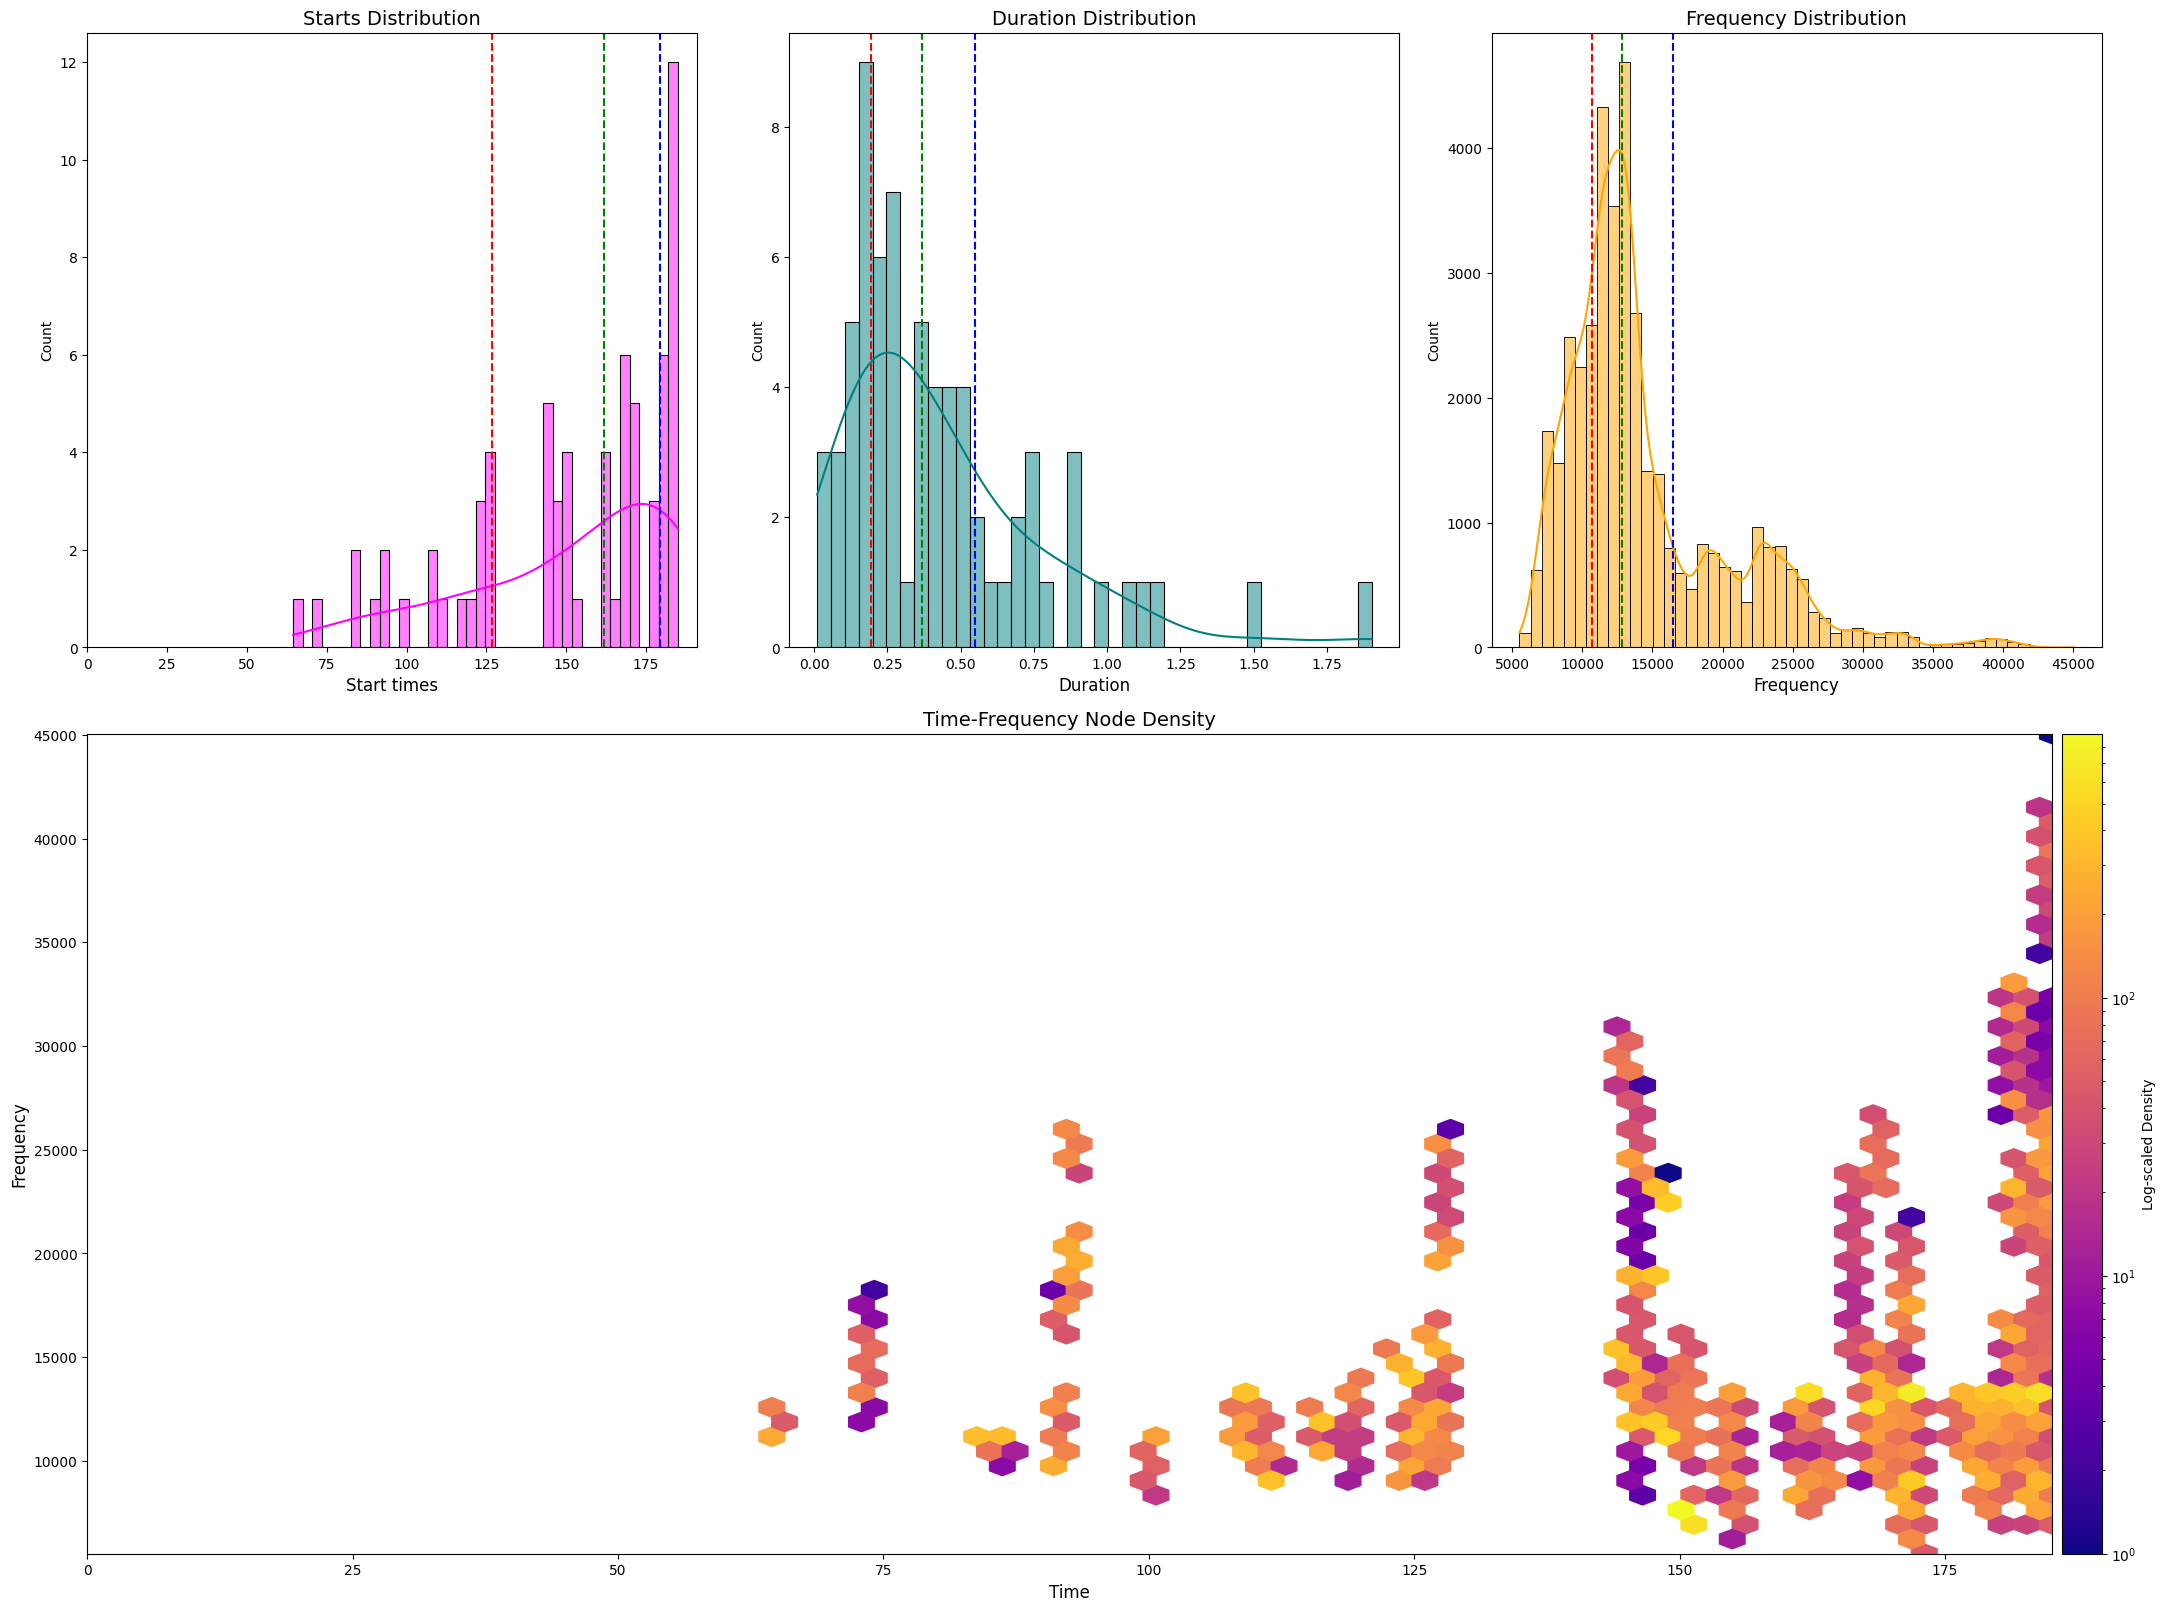

Loaded 12 annotated whistles from Qx-Dd-SCI0608-N1-060814-150255.bin
Minimum time: 0.72
Maximum time: 105.84745312499992
Minimum frequency: 7679.773112809122
low quartile frequency: 10604.61873239071
high quartile frequency: 13058.629278521226
Maximum frequency: 19057.05574912892
Minimum duration: 0.11475409836065609
low quartile duration: 0.18048360655737739
high quartile duration: 0.277191286714459
Maximum duration: 0.4291080601092858
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


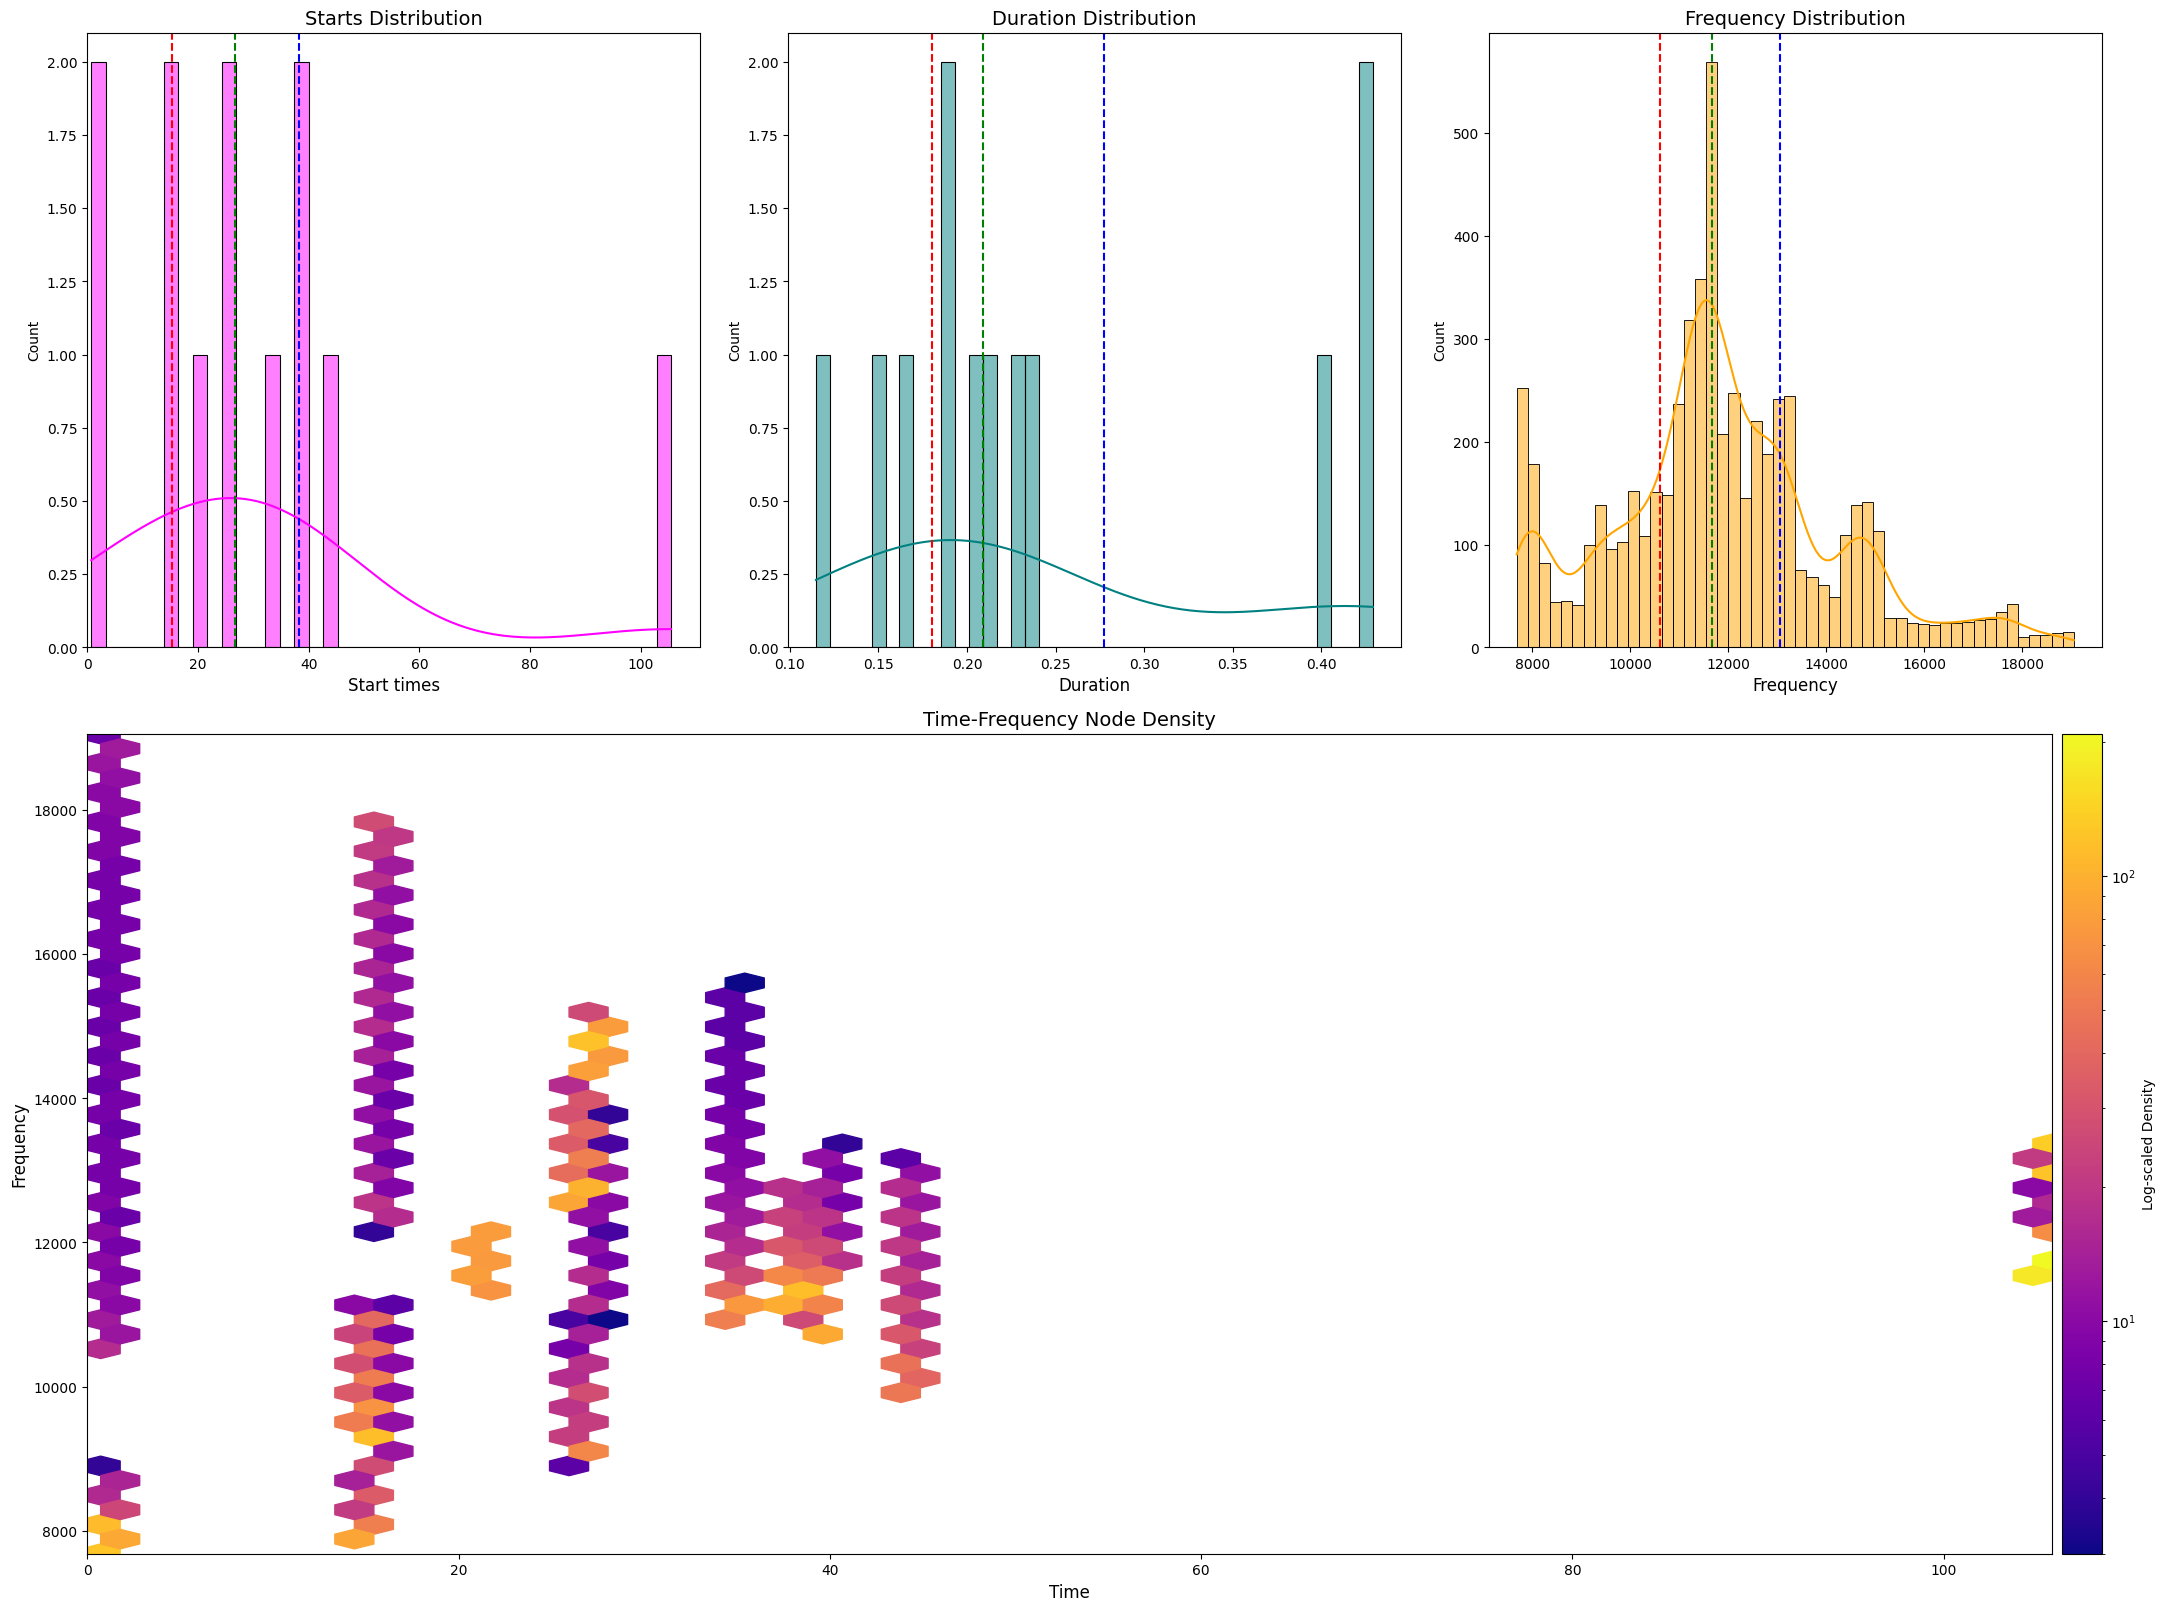

Loaded 2771 annotated whistles from Qx-Dd-SC03-TAT09-060516-211350.bin
Minimum time: 0.04292120983935743
Maximum time: 369.10634374769796
Minimum frequency: 4721.207777723088
low quartile frequency: 8357.855662093209
high quartile frequency: 12207.669775958686
Maximum frequency: 21051.164902556156
Minimum duration: 0.004084967320238775
low quartile duration: 0.07872928176794858
high quartile duration: 0.31132094518201825
Maximum duration: 2.7066548580513086
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


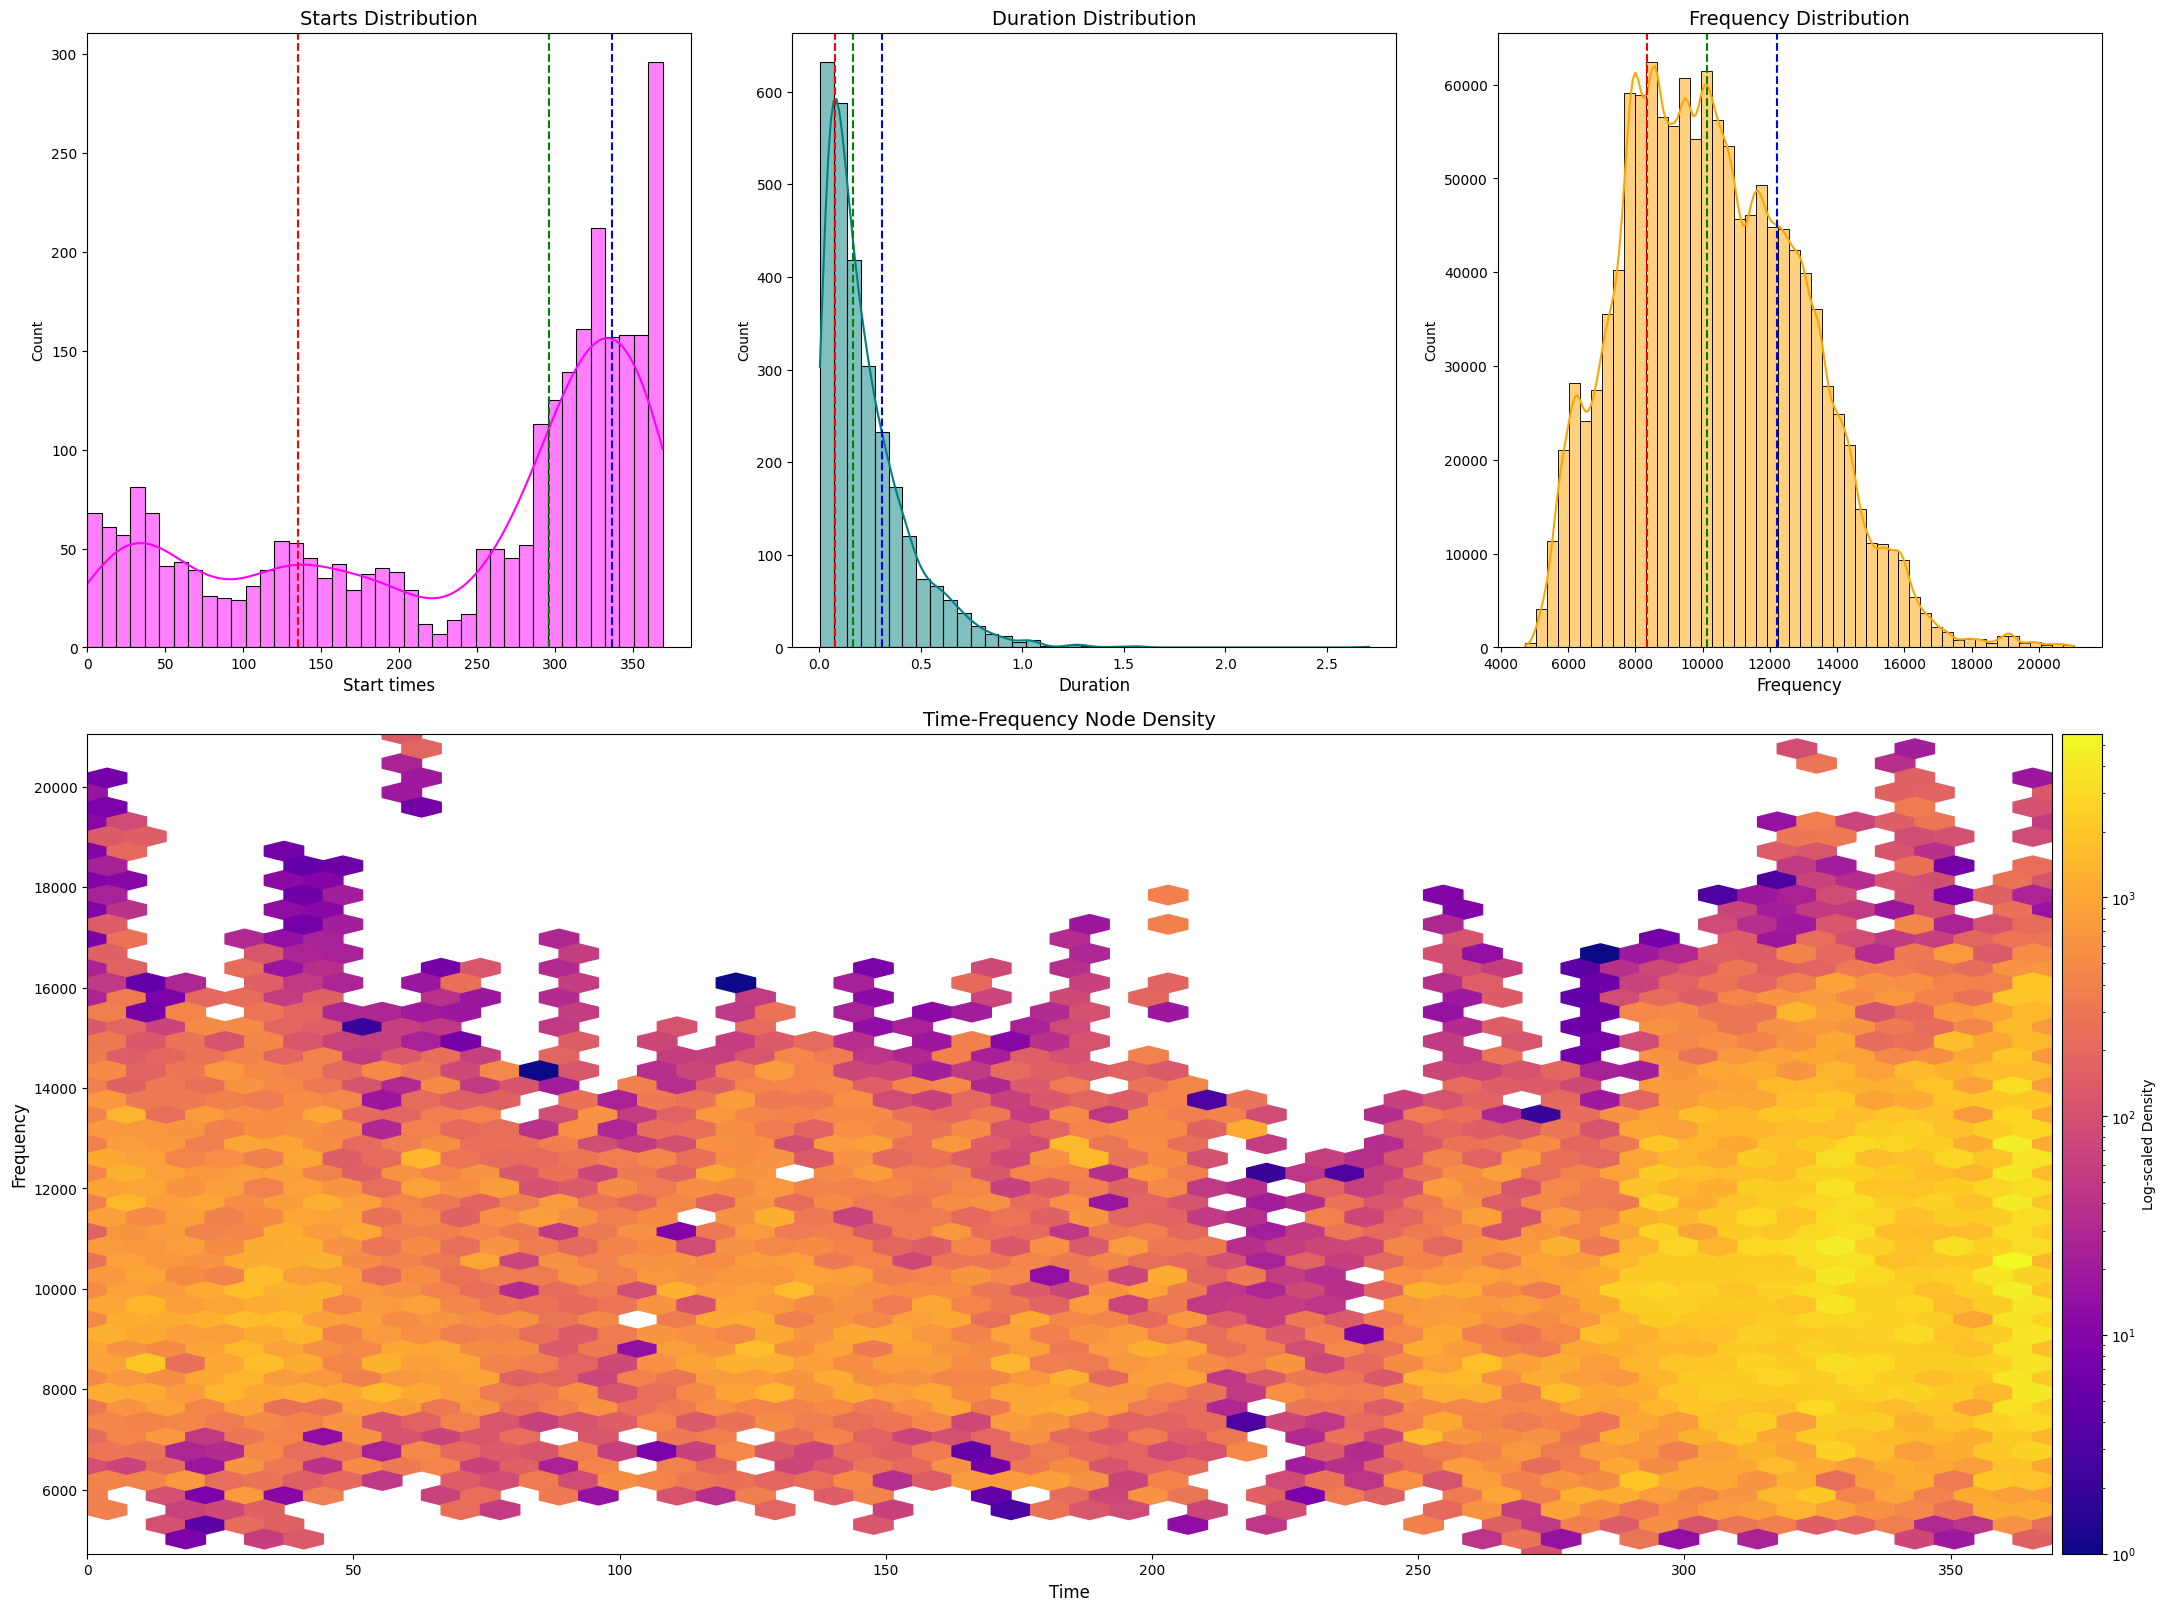

Loaded 1444 annotated whistles from Qx-Tt-SCI0608-N1-060814-123433.bin
Minimum time: 4.383431262312336
Maximum time: 915.2152343750067
Minimum frequency: 4985.601289329242
low quartile frequency: 11355.19528934063
high quartile frequency: 24336.140999189025
Maximum frequency: 52448.60499265786
Minimum duration: 0.016574585635353856
low quartile duration: 0.17843207120981042
high quartile duration: 0.42209059944405425
Maximum duration: 2.258064516129025
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 18


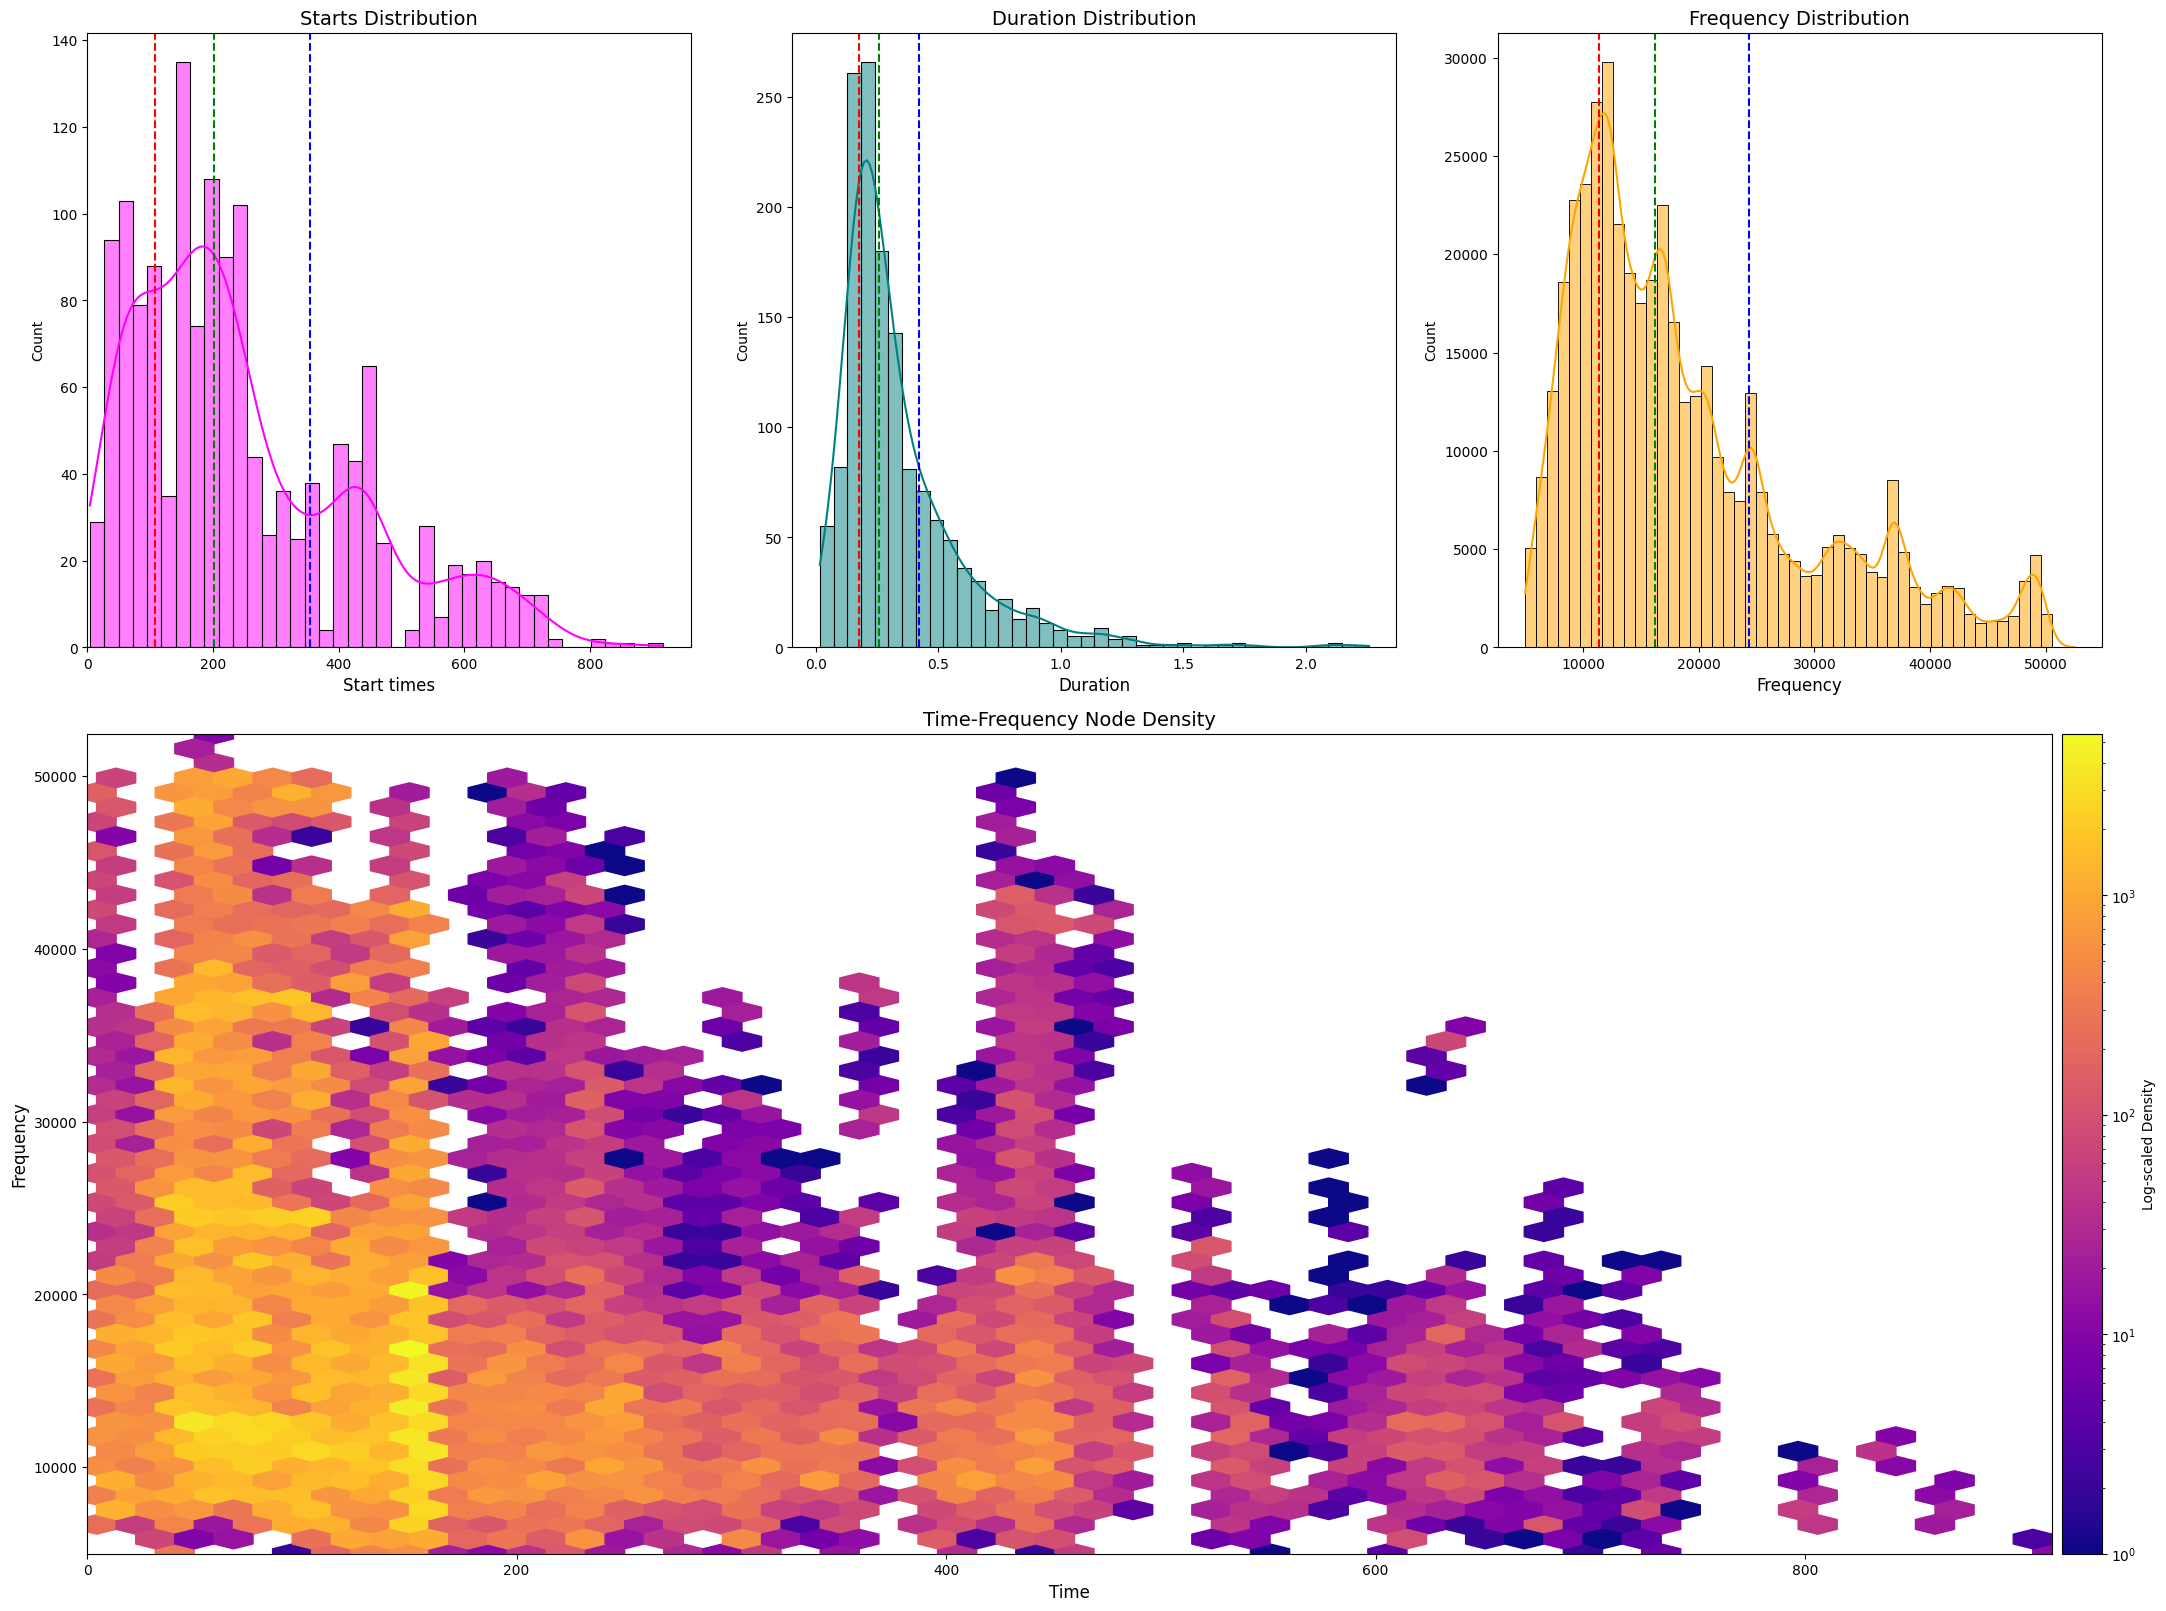

Loaded 83 annotated whistles from palmyra092007FS192-071012-012000.bin
Minimum time: 2.4329943830570904
Maximum time: 125.77359878453039
Minimum frequency: 5025.523765483692
low quartile frequency: 14052.923478503675
high quartile frequency: 25588.81731116275
Maximum frequency: 59200.327574583396
Minimum duration: 0.0055248618784524695
low quartile duration: 0.026243093922651894
high quartile duration: 0.18162983425414403
Maximum duration: 1.4378476848197863
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


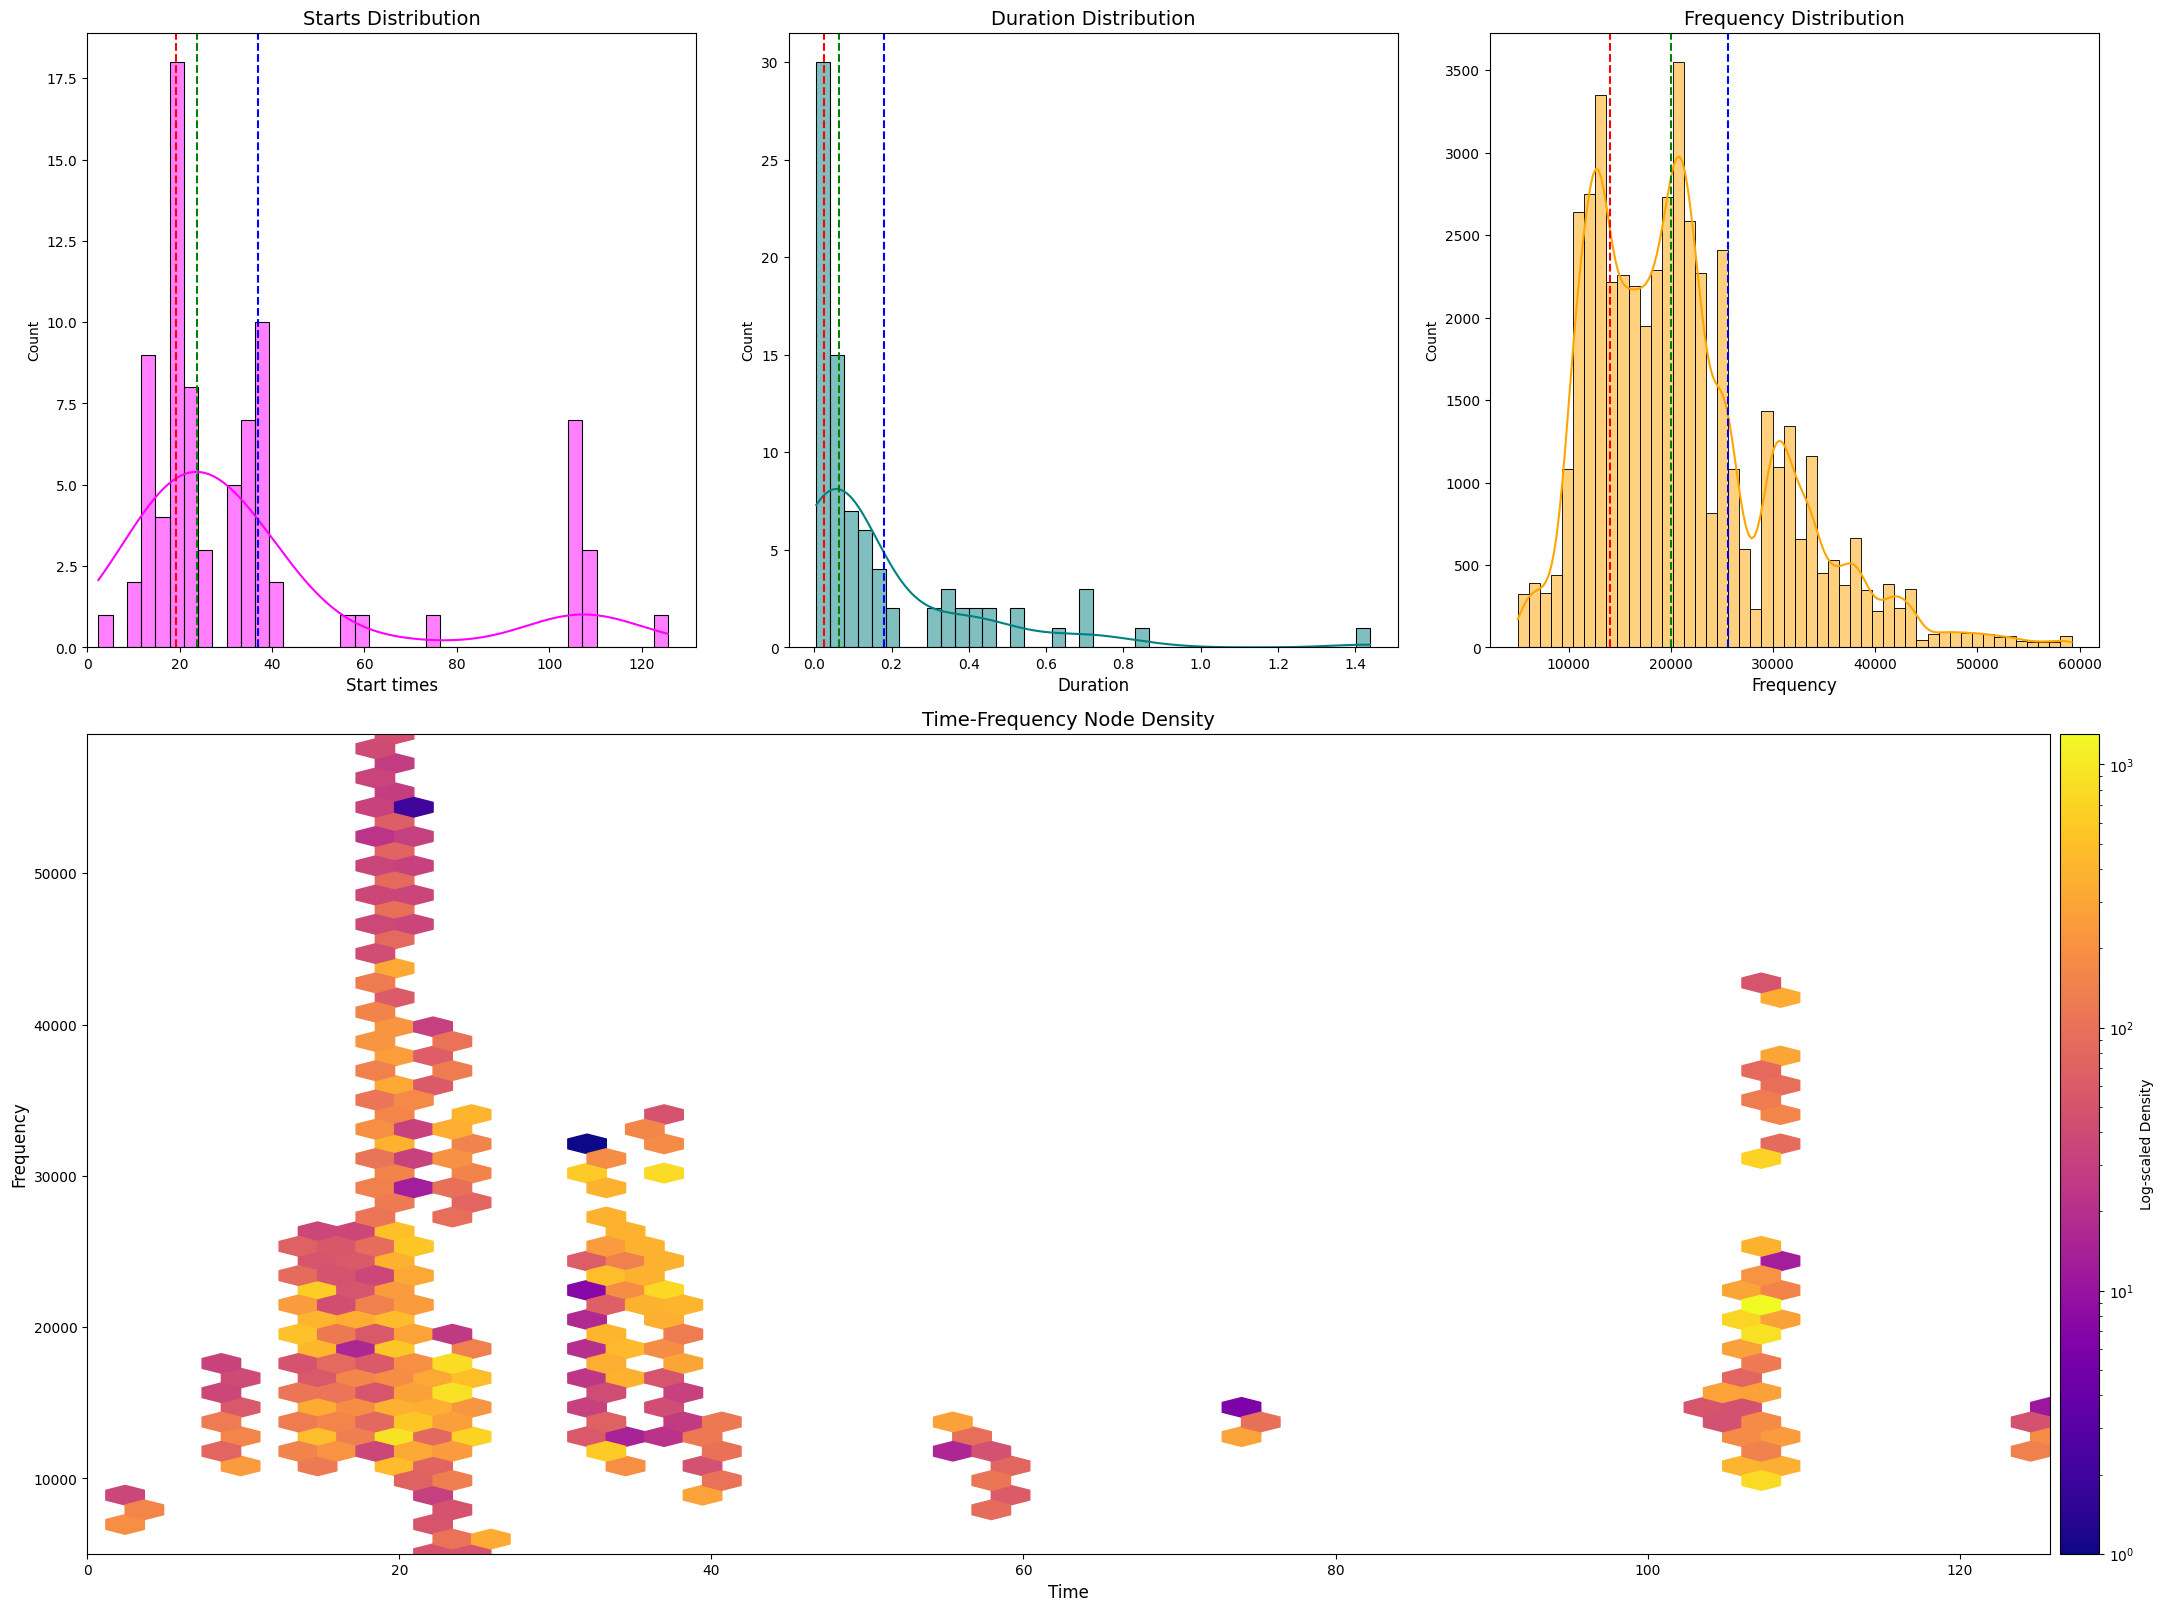

Loaded 1529 annotated whistles from Qx-Dc-SC03-TAT09-060516-173000.bin
Minimum time: 0.006767278532031249
Maximum time: 283.27345566298345
Minimum frequency: 5037.446771333703
low quartile frequency: 12563.624359451615
high quartile frequency: 22841.43115869369
Maximum frequency: 95265.05139500734
Minimum duration: 0.009646302250800431
low quartile duration: 0.11858475894245402
high quartile duration: 0.5055248618784507
Maximum duration: 2.1546961325966834
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


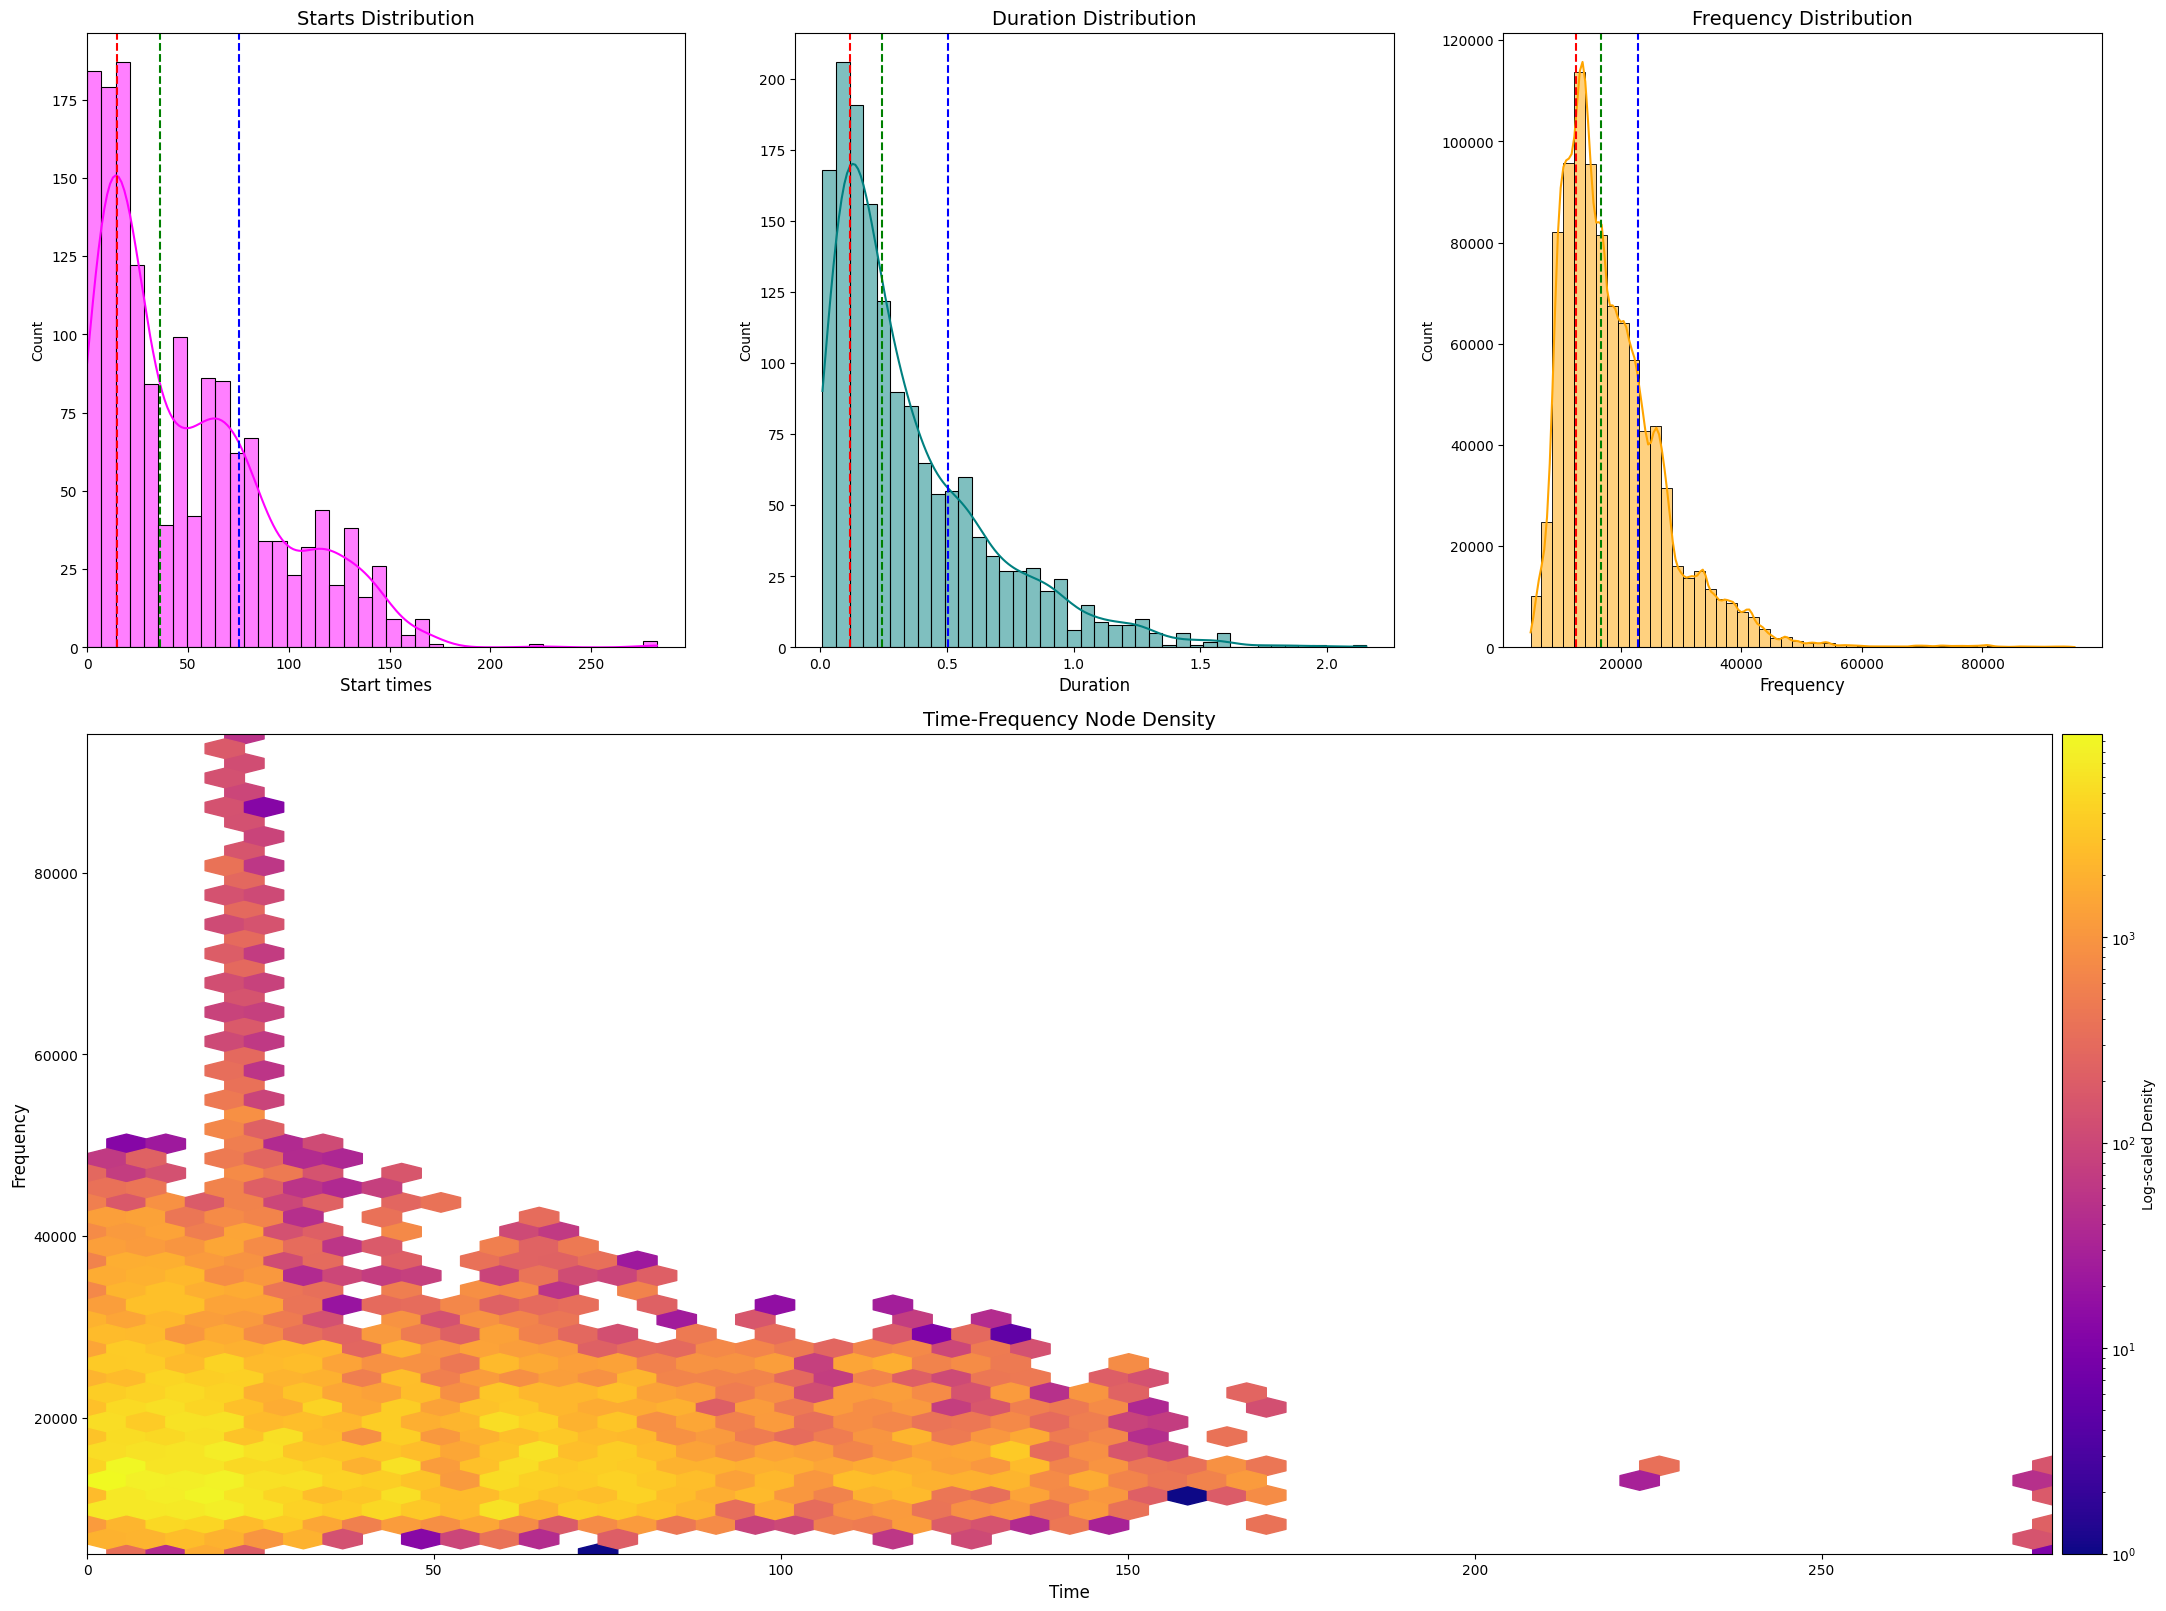

Loaded 221 annotated whistles from palmyra102006-061030-230343_4.bin
Minimum time: 5.109096022099448
Maximum time: 105.83354686924494
Minimum frequency: 5121.145374449341
low quartile frequency: 11092.46850118586
high quartile frequency: 19745.258278602734
Maximum frequency: 69021.65932452277
Minimum duration: 0.009668508287294486
low quartile duration: 0.06491712707182273
high quartile duration: 0.17541436464087212
Maximum duration: 1.9419889502762437
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


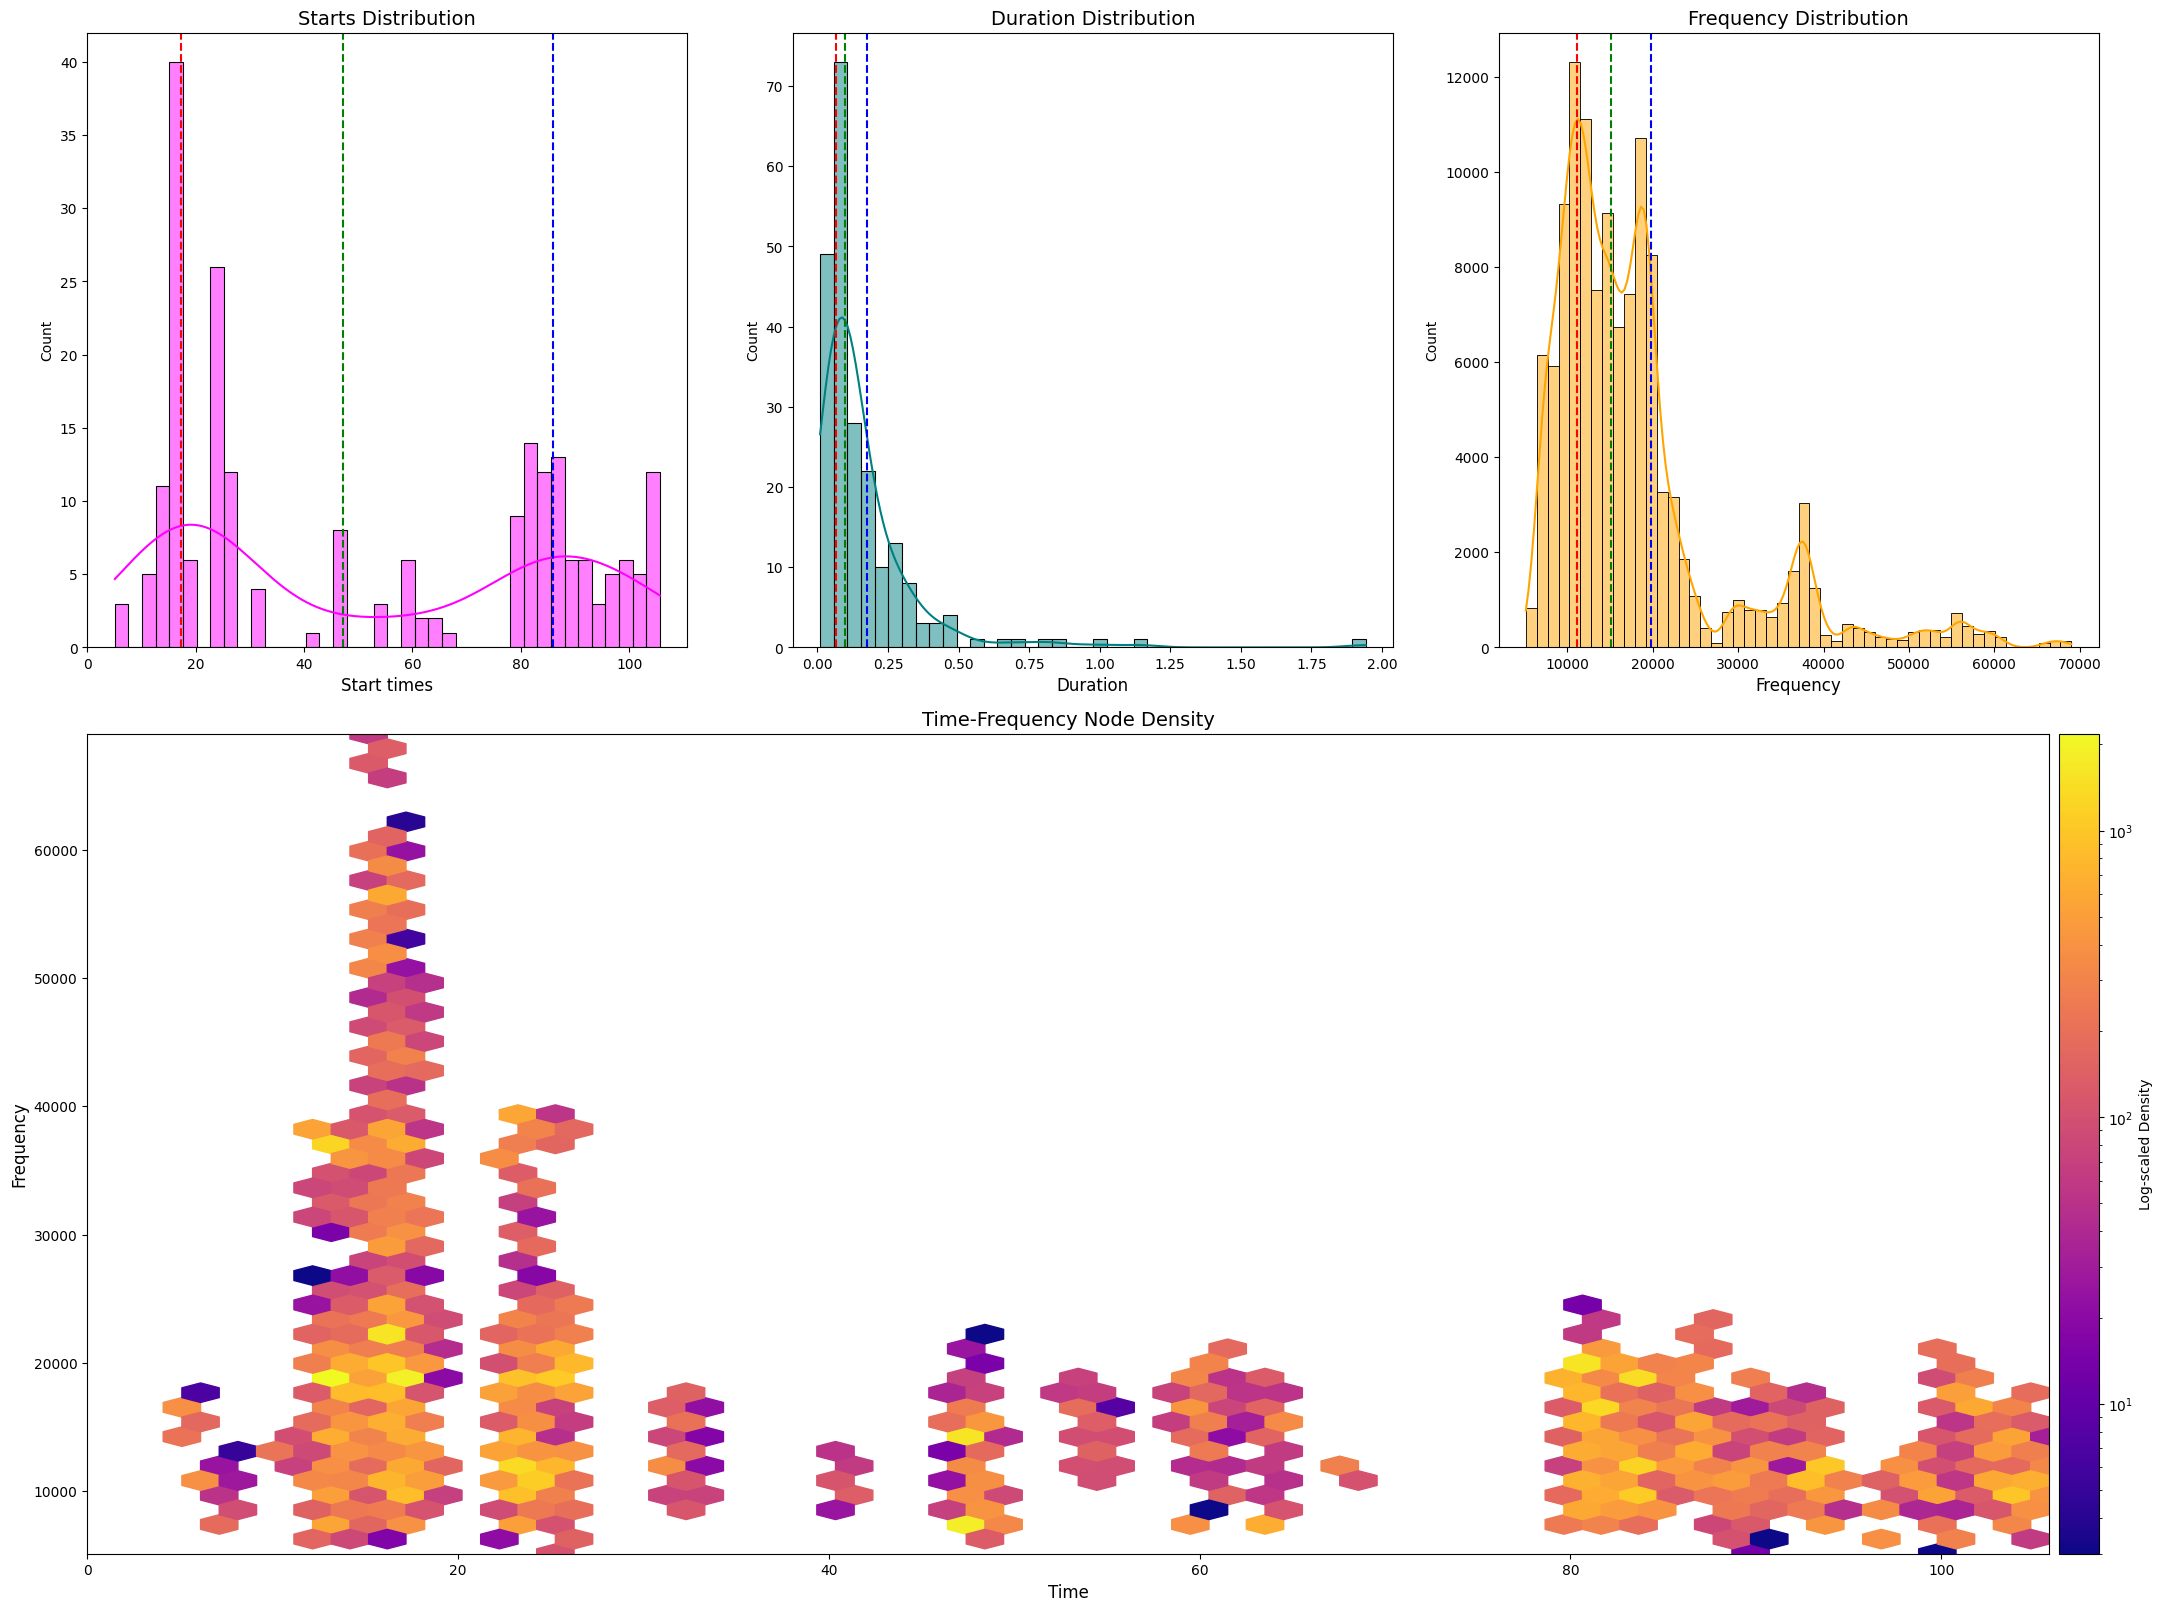

Loaded 23 annotated whistles from palmyra092007FS192-071012-010614.bin
Minimum time: 2.5628253038674034
Maximum time: 62.987552394106814
Minimum frequency: 5825.99118942732
low quartile frequency: 11605.597949644085
high quartile frequency: 24360.02776669699
Maximum frequency: 48896.672837433085
Minimum duration: 0.03314917127071482
low quartile duration: 0.1802486187845318
high quartile duration: 0.8784530386740315
Maximum duration: 1.5372928176795586
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


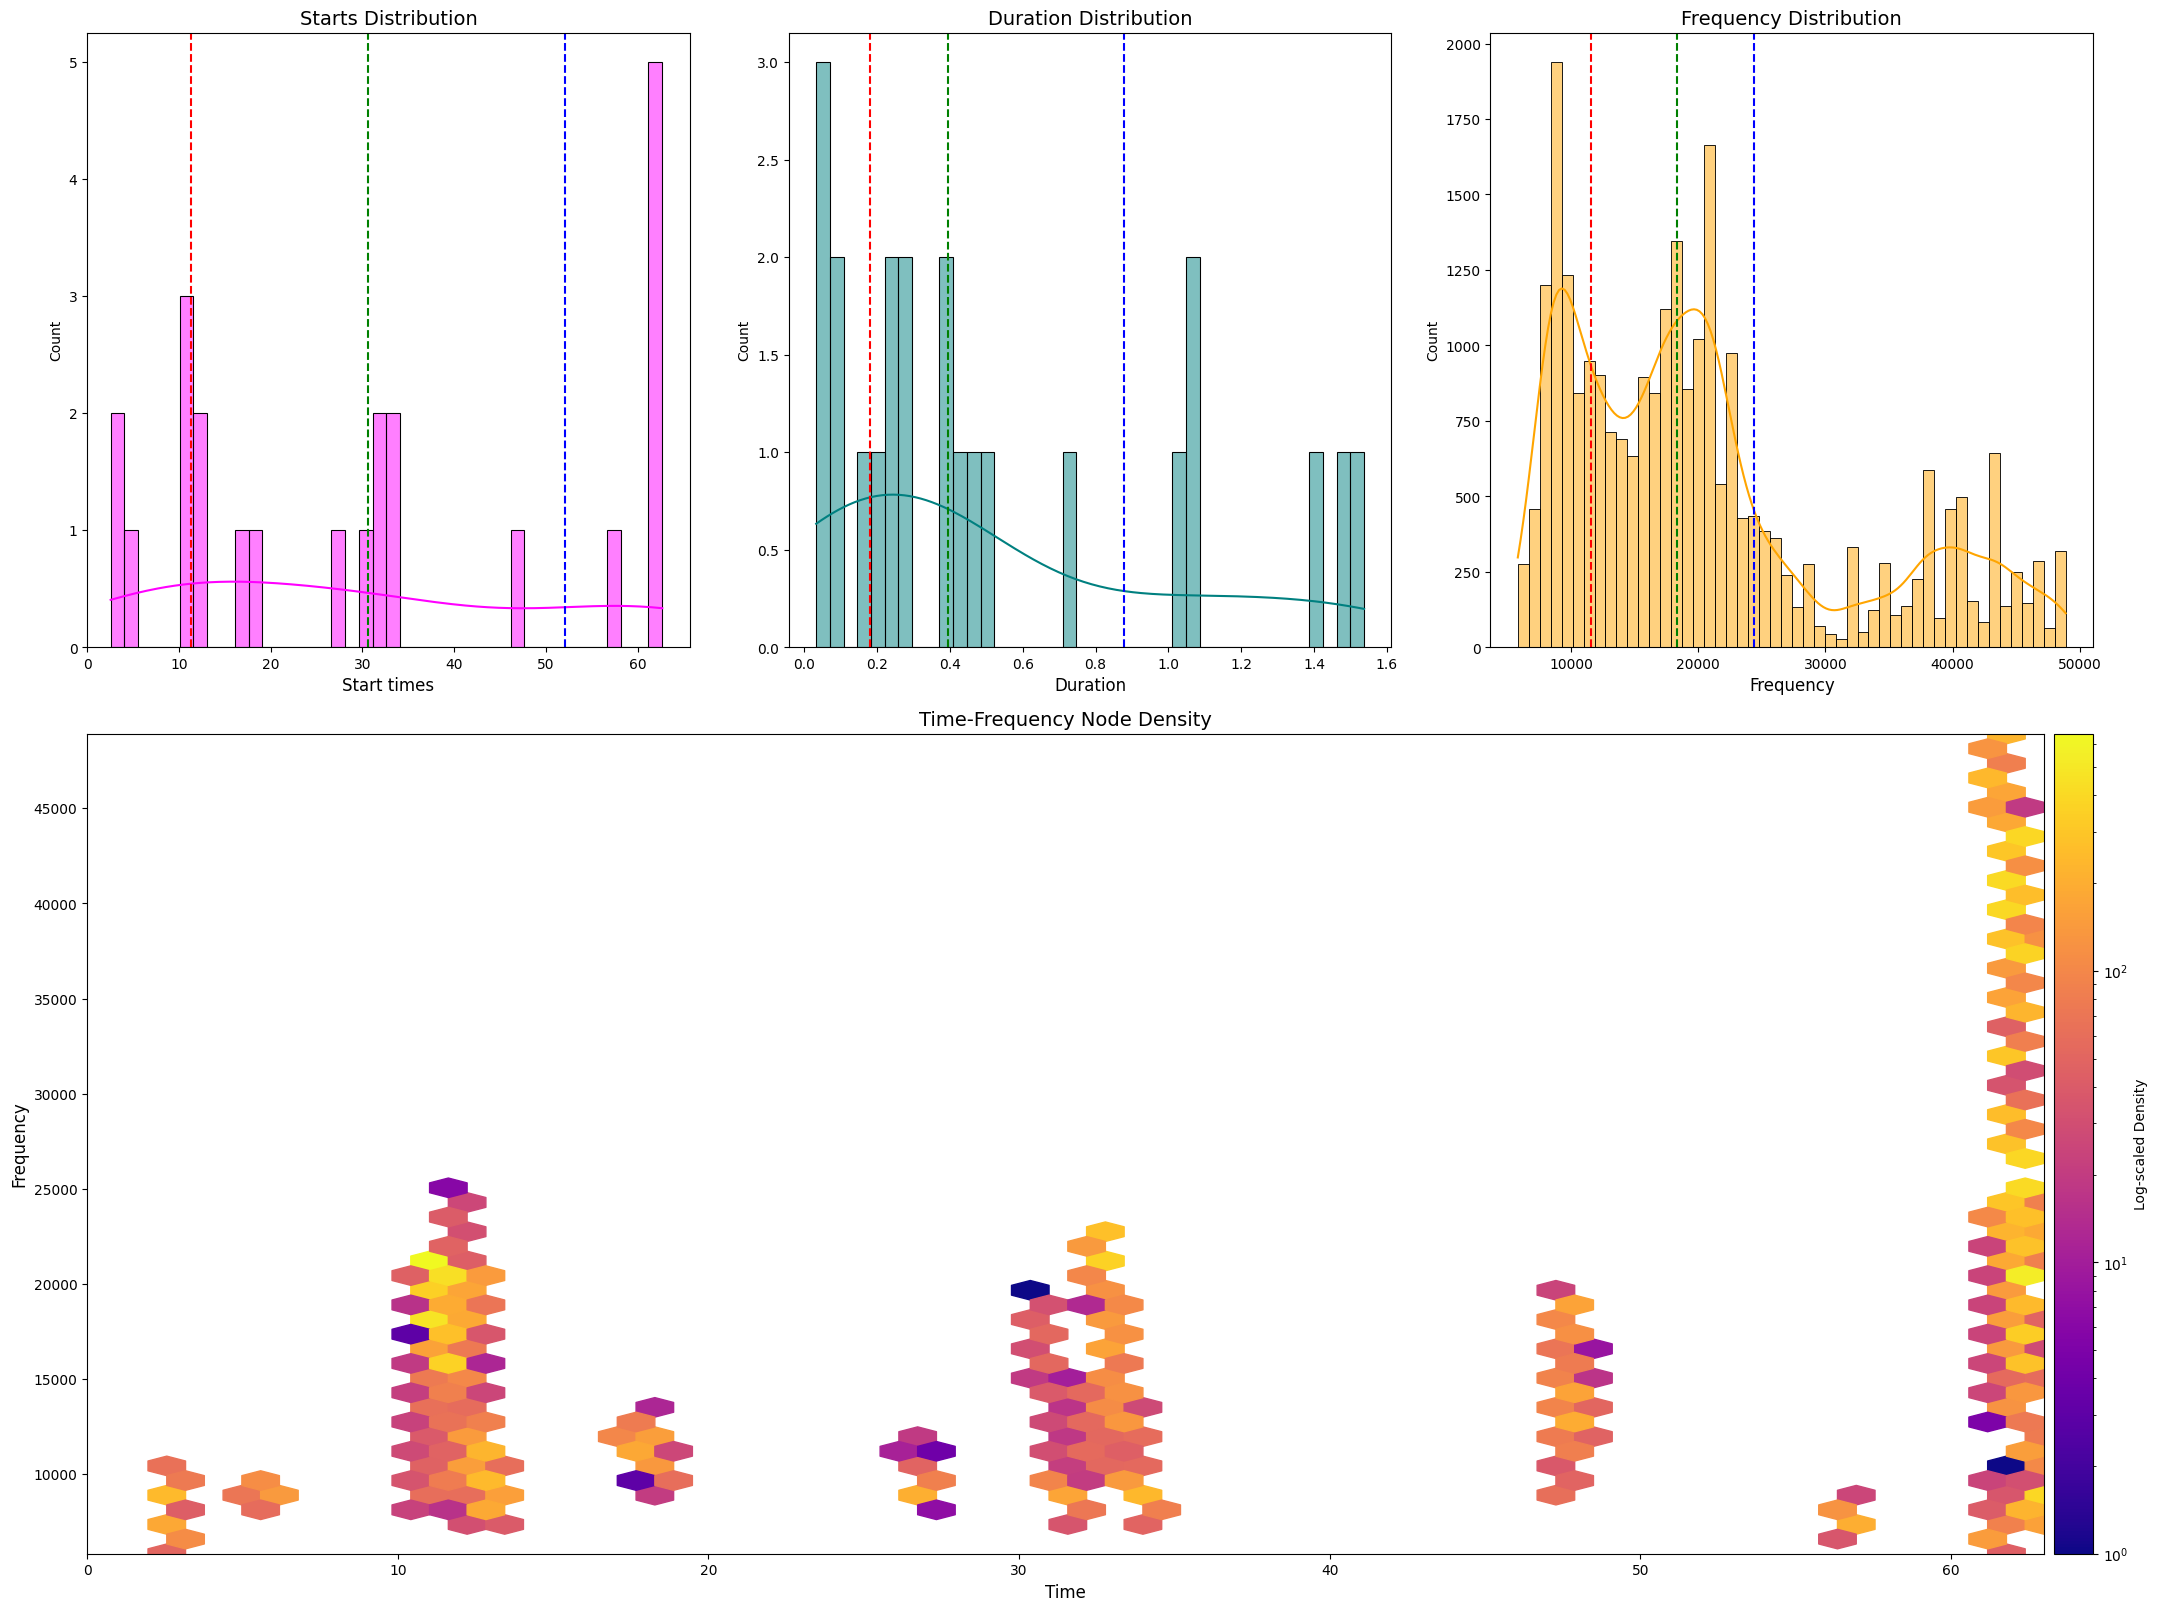

Loaded 340 annotated whistles from palmyra092007FS192-070924-210000.bin
Minimum time: 6.441265009208104
Maximum time: 92.4592341436464
Minimum frequency: 5002.885414090014
low quartile frequency: 10624.275251557074
high quartile frequency: 18343.97238230938
Maximum frequency: 44416.29955947136
Minimum duration: 0.008287292817684033
low quartile duration: 0.13639502762430666
high quartile duration: 0.5138121546961294
Maximum duration: 2.0580110497237527
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


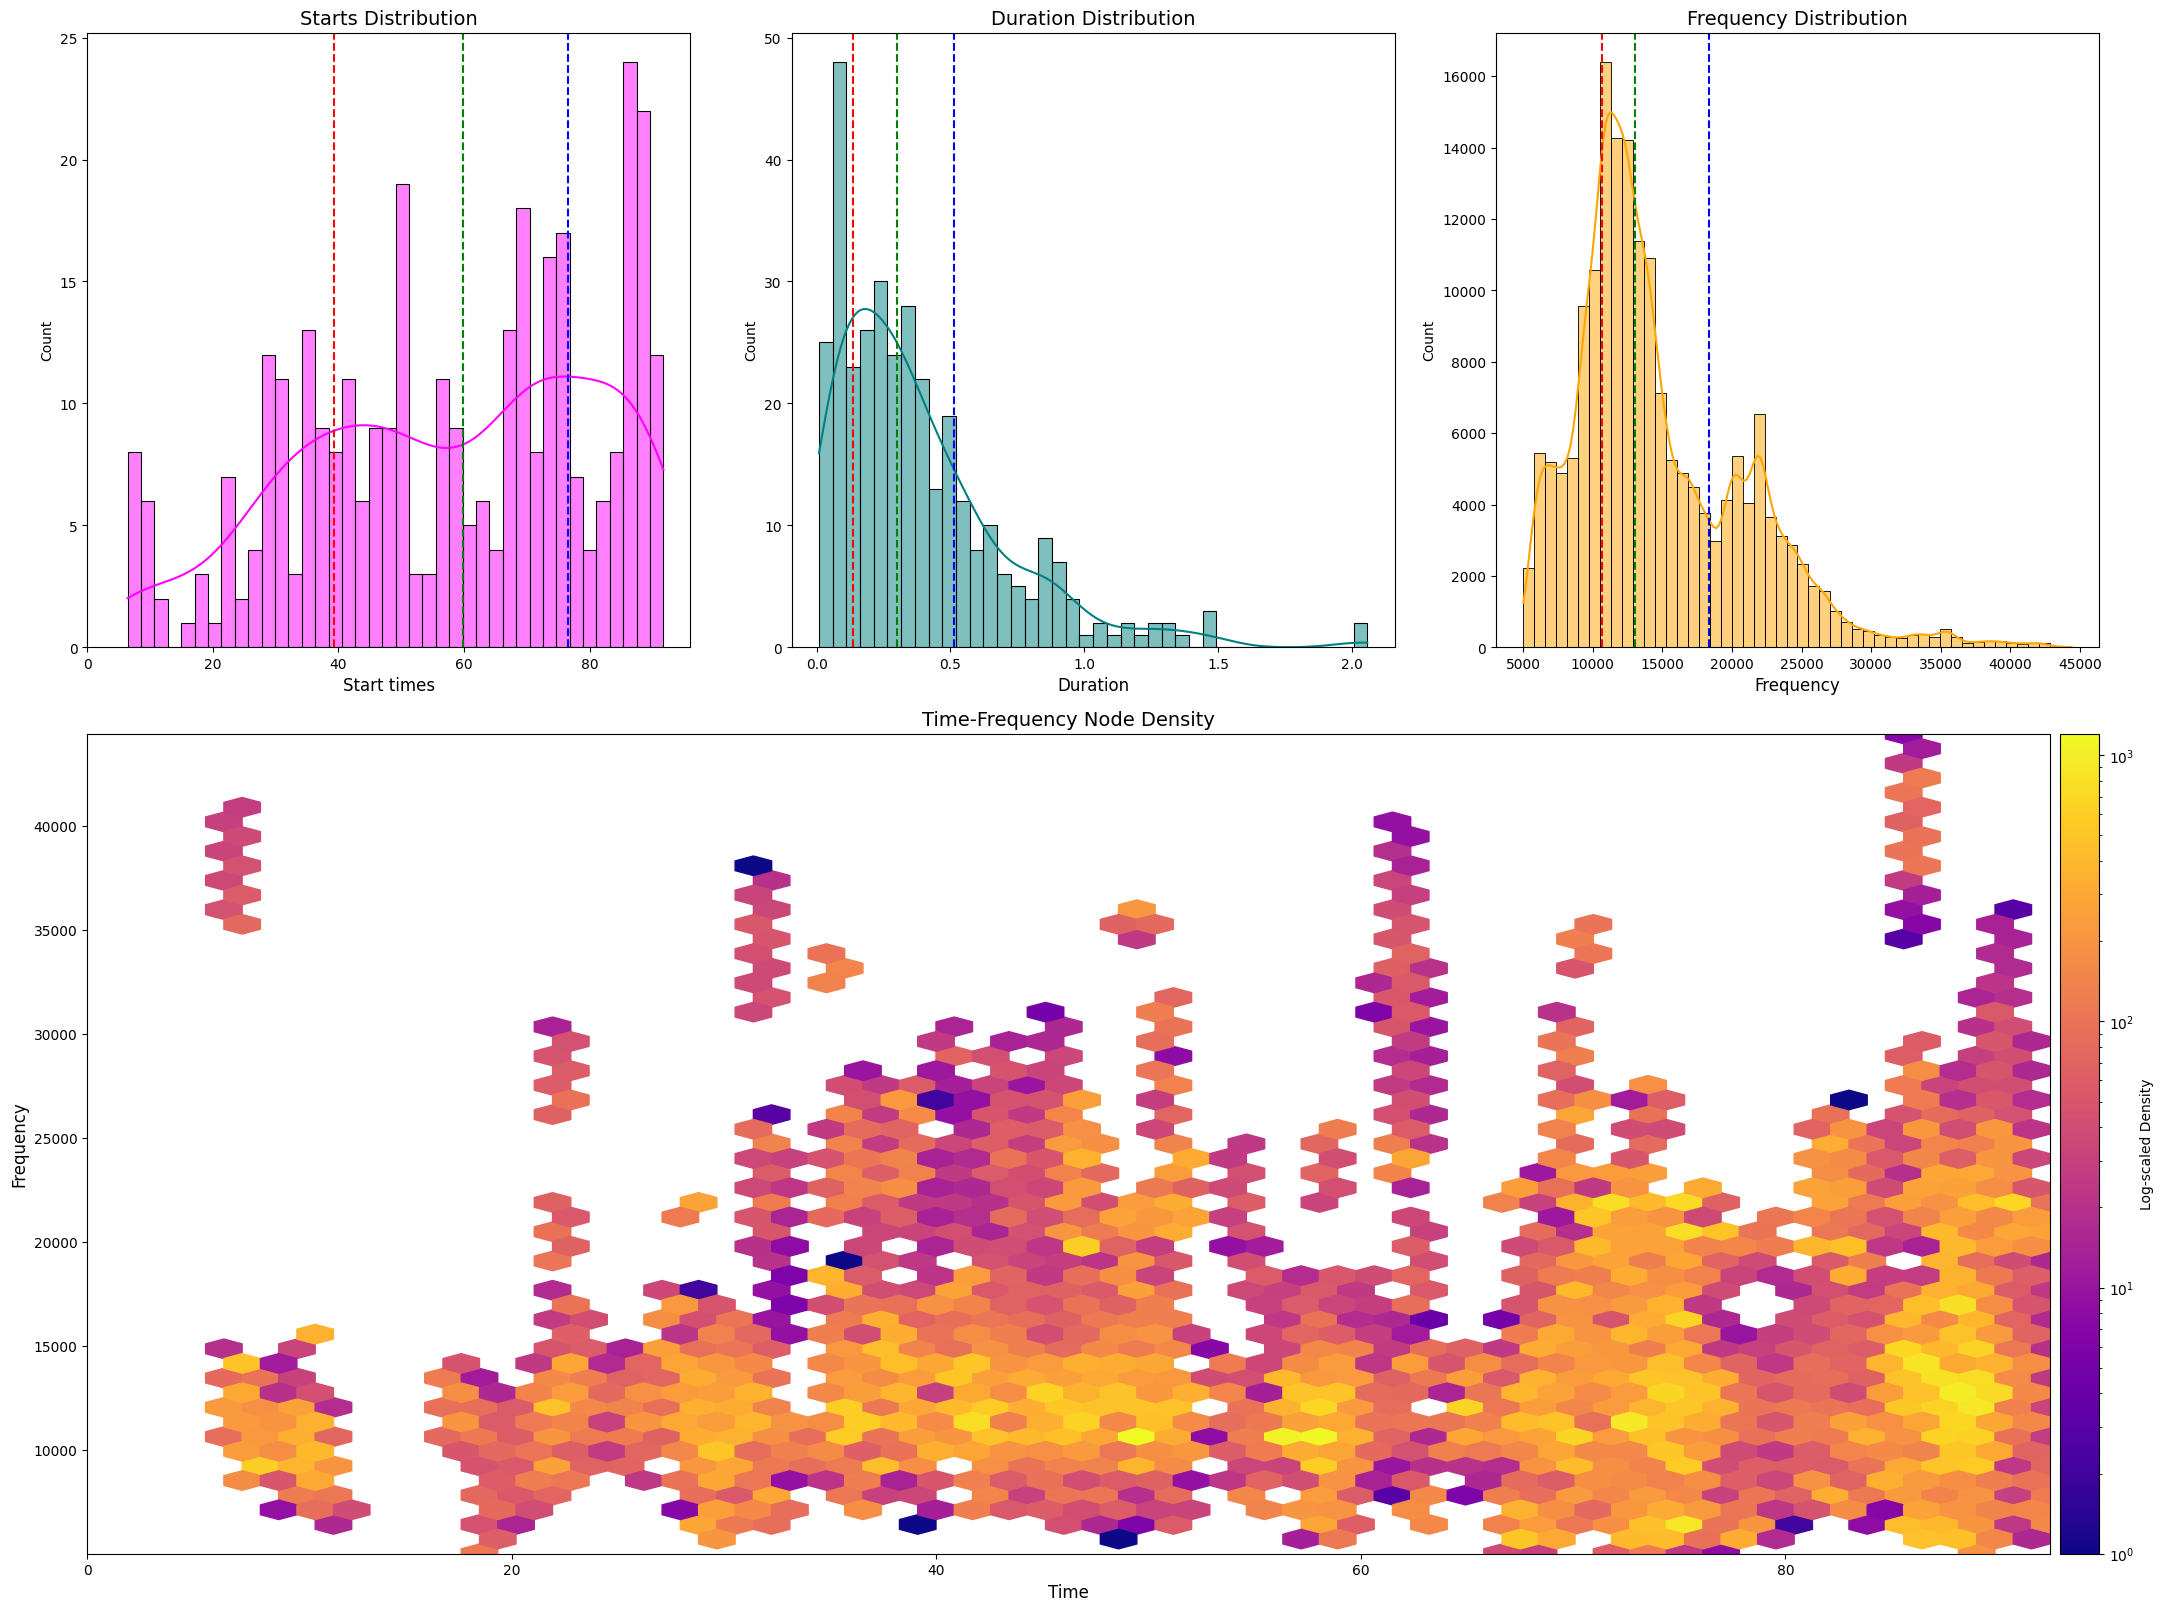

Loaded 233 annotated whistles from Qx-Dd-SCI0608-Ziph-060816-151032.bin
Minimum time: 52.174542937853104
Maximum time: 270.92125071823205
Minimum frequency: 5130.308880308881
low quartile frequency: 9656.775559178845
high quartile frequency: 18682.432432432433
Maximum frequency: 42051.158301158306
Minimum duration: 0.01016949152543134
low quartile duration: 0.08474576271186862
high quartile duration: 0.26779661016948353
Maximum duration: 1.082872928176812
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


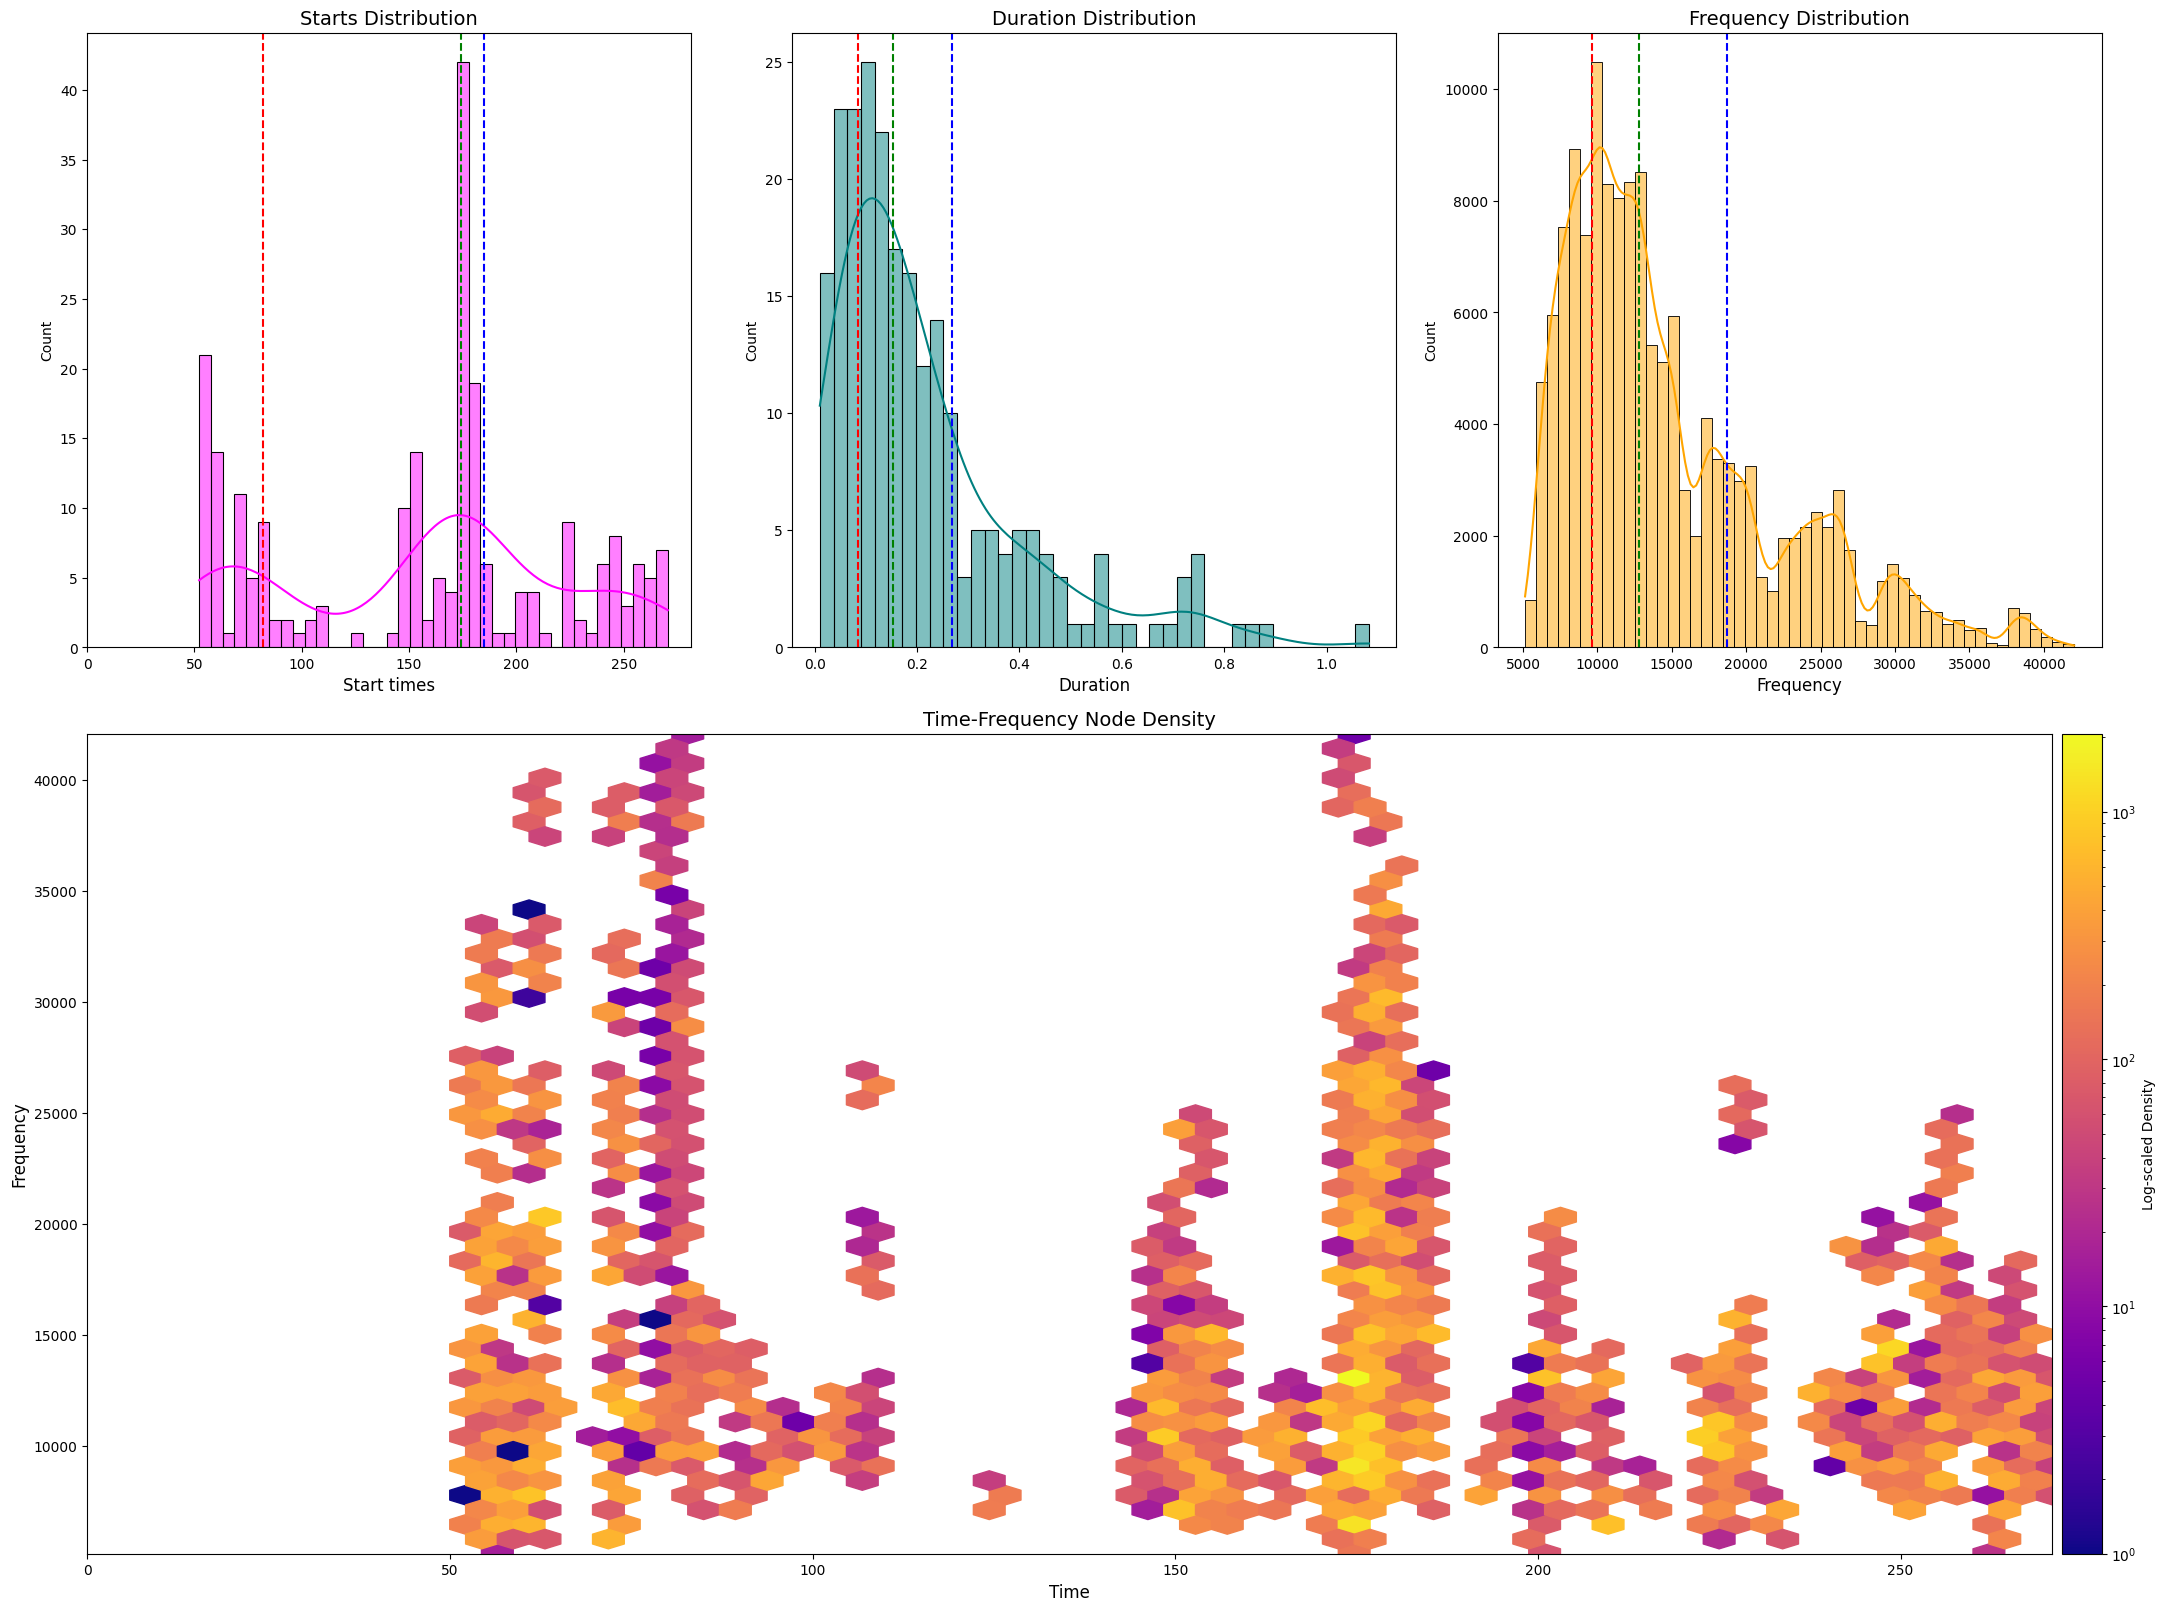

Processing test data
Loaded 759 annotated whistles from Qx-Dc-CC0411-TAT11-CH2-041114-154040-s.bin
Minimum time: 1.7879635589318603
Maximum time: 299.9842379900856
Minimum frequency: 5220.218258585537
low quartile frequency: 9829.76201811857
high quartile frequency: 14659.533542104615
Maximum frequency: 30221.02174849634
Minimum duration: 0.002164502164504256
low quartile duration: 0.04978354978354105
high quartile duration: 0.2464050145437966
Maximum duration: 1.1168831168831161
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


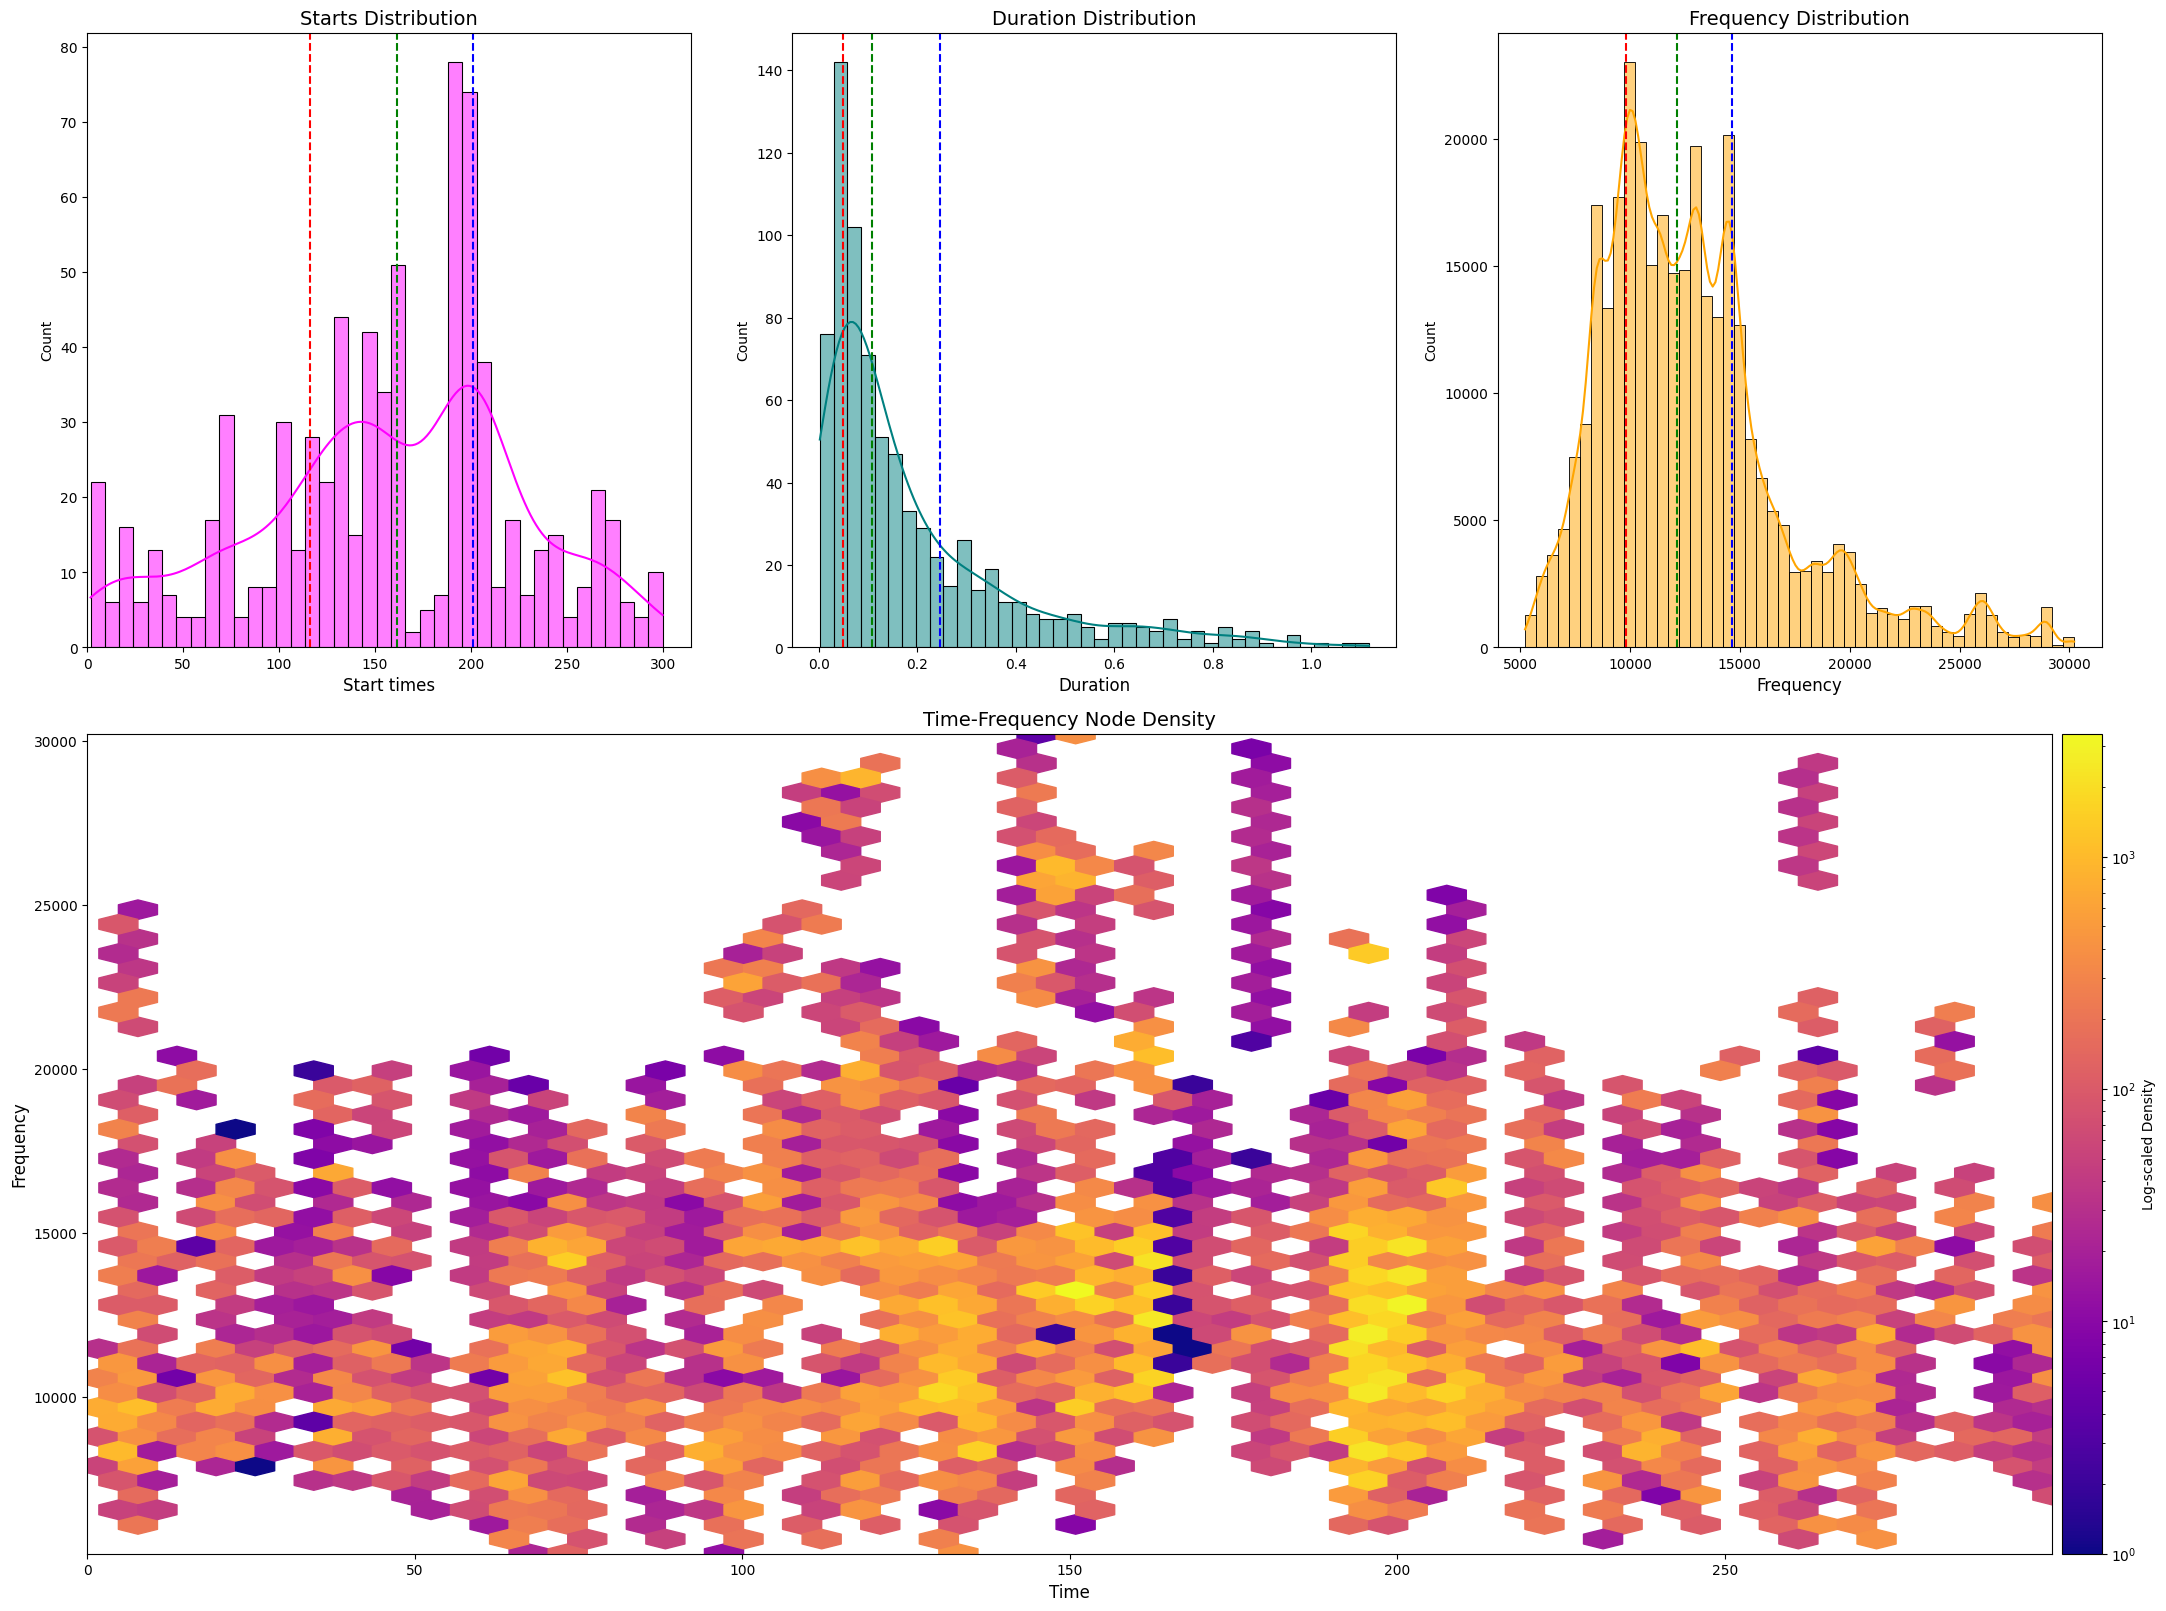

Loaded 539 annotated whistles from palmyra092007FS192-070924-205305.bin
Minimum time: 2.009503440702782
Maximum time: 248.91073690607735
Minimum frequency: 6023.574814283633
low quartile frequency: 11441.73821314033
high quartile frequency: 17480.877088330322
Maximum frequency: 46530.83700440527
Minimum duration: 0.012430939226504734
low quartile duration: 0.09530386740330954
high quartile duration: 0.37292817679558254
Maximum duration: 2.292817679558027
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


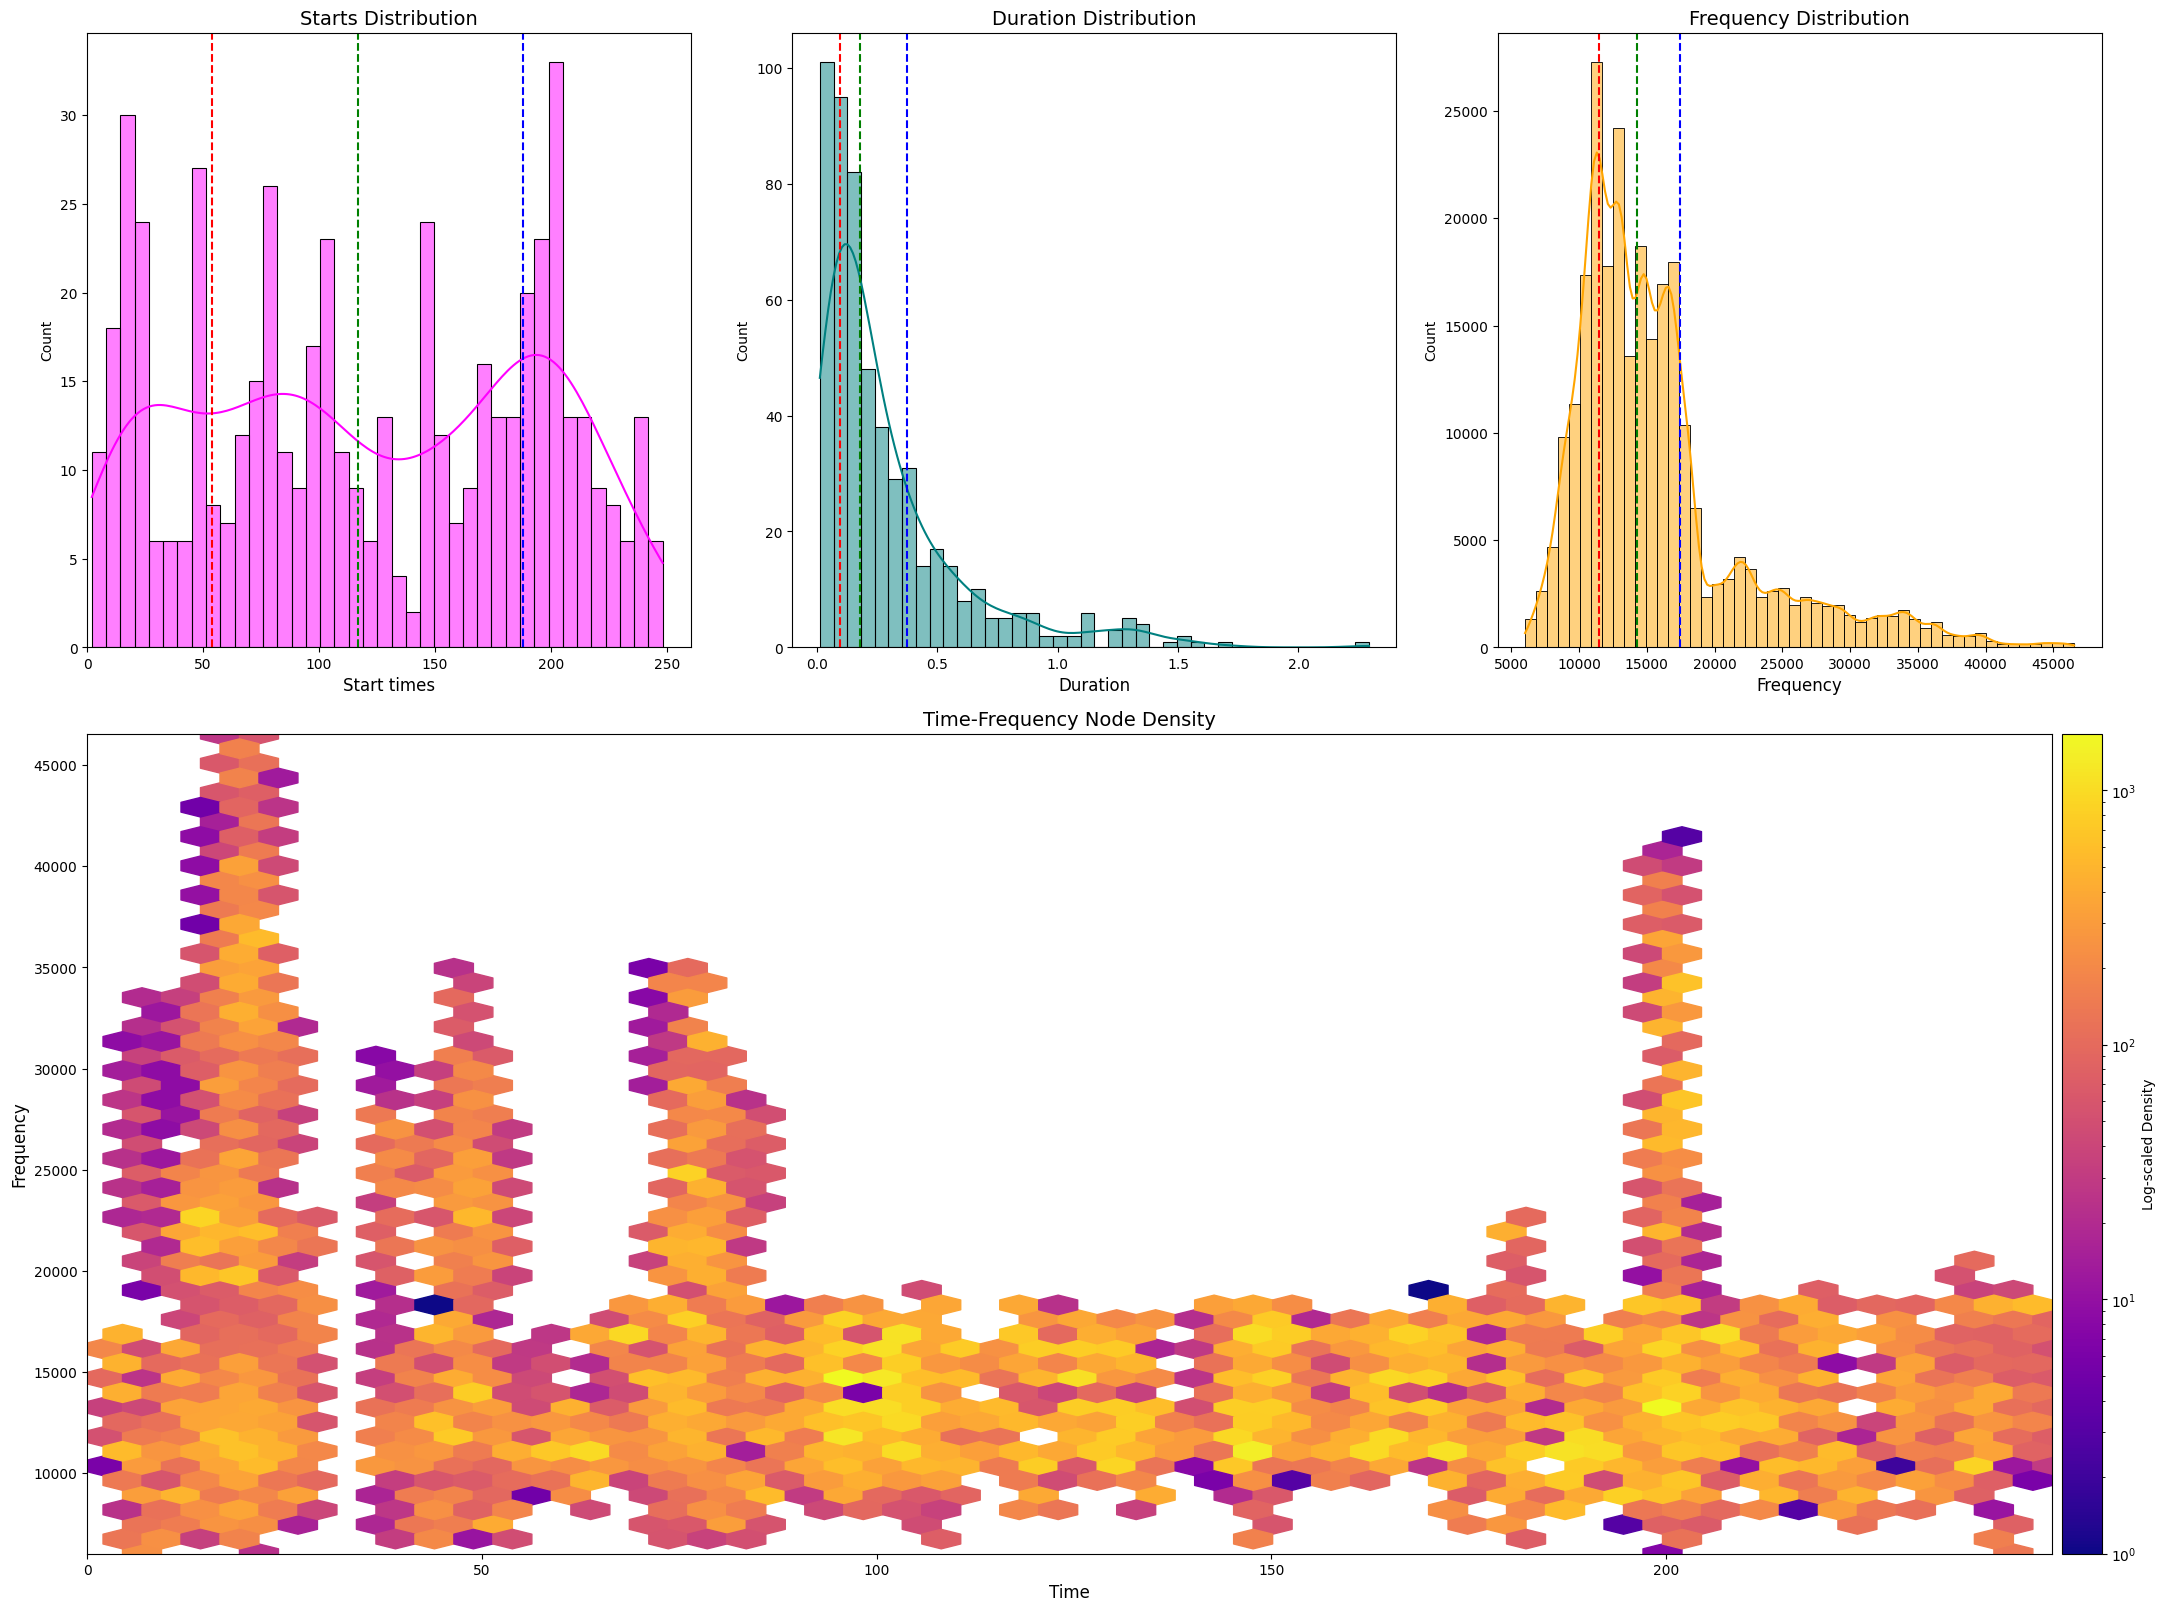

Loaded 533 annotated whistles from QX-Dc-FLIP0610-VLA-061015-165000.bin
Minimum time: 0.0
Maximum time: 296.45166582125603
Minimum frequency: 5108.060146391714
low quartile frequency: 10262.683792660788
high quartile frequency: 18607.491227549755
Maximum frequency: 33875.0
Minimum duration: 0.006441223832531762
low quartile duration: 0.12560386473430185
high quartile duration: 0.4005524861878458
Maximum duration: 1.4720000000000084
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


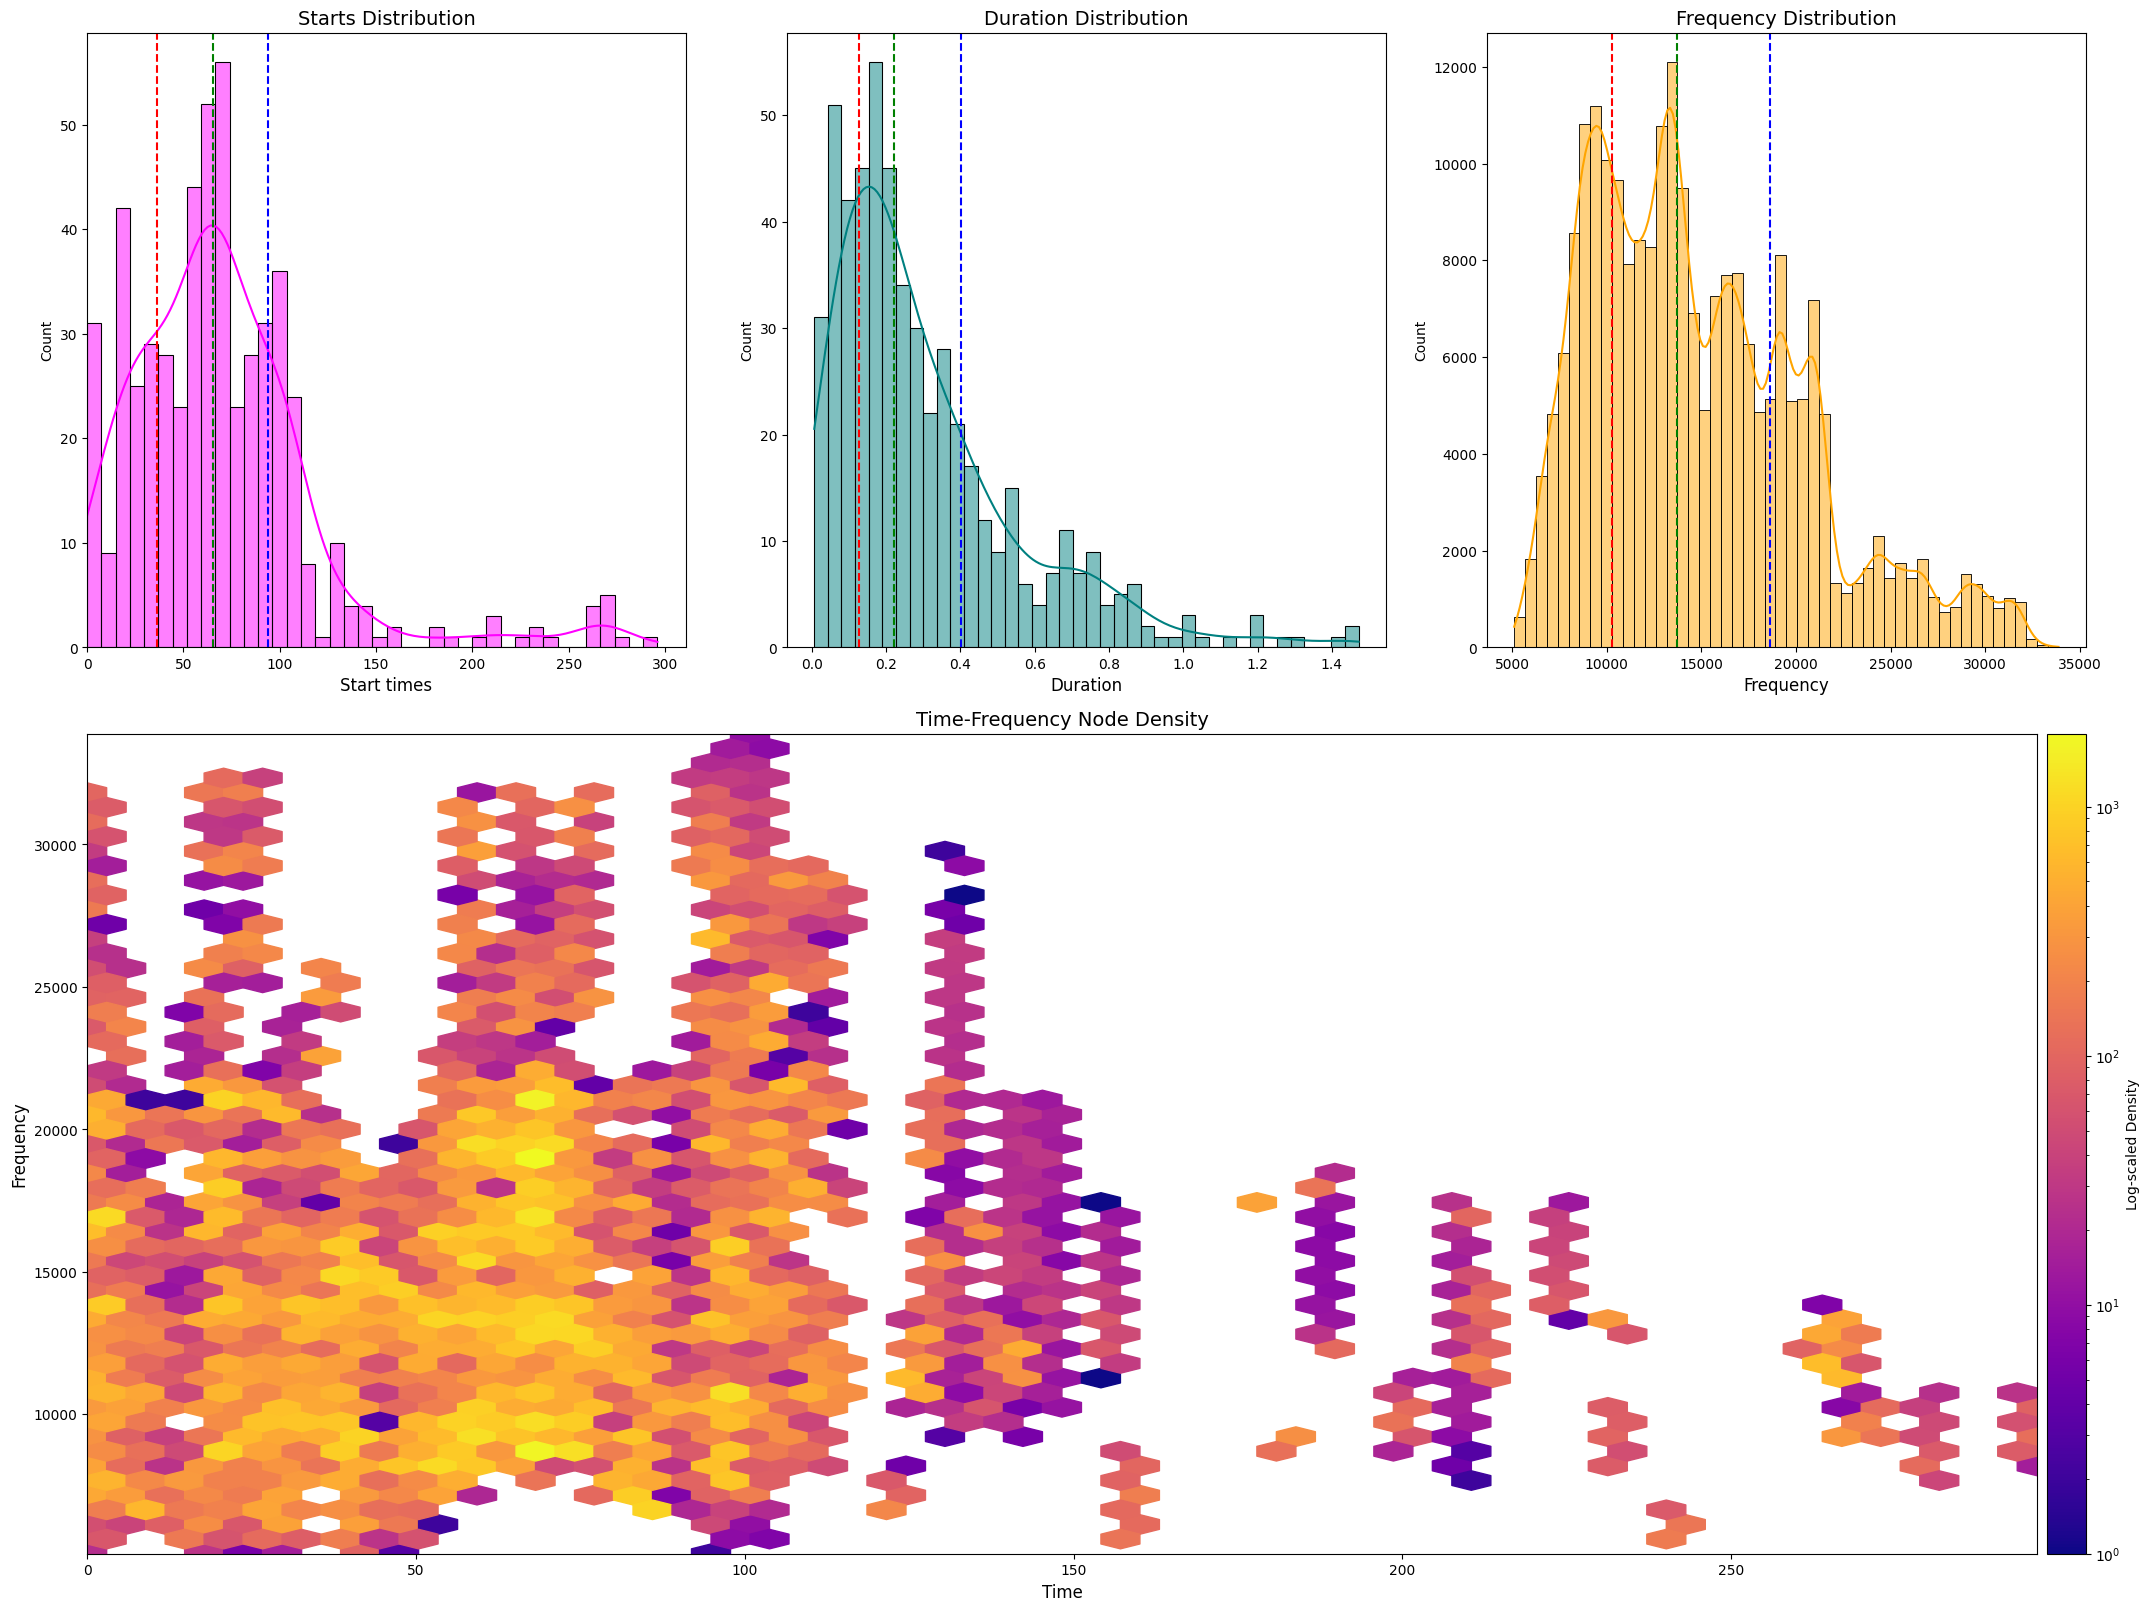

Loaded 336 annotated whistles from palmyra092007FS192-070924-205730.bin
Minimum time: 0.232
Maximum time: 147.10287555248618
Minimum frequency: 5126.56646372627
low quartile frequency: 10382.27303625385
high quartile frequency: 16640.072430200526
Maximum frequency: 38039.6475770925
Minimum duration: 0.022790055248620433
low quartile duration: 0.10715469613259643
high quartile duration: 0.42368784530386705
Maximum duration: 1.6781767955801143
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


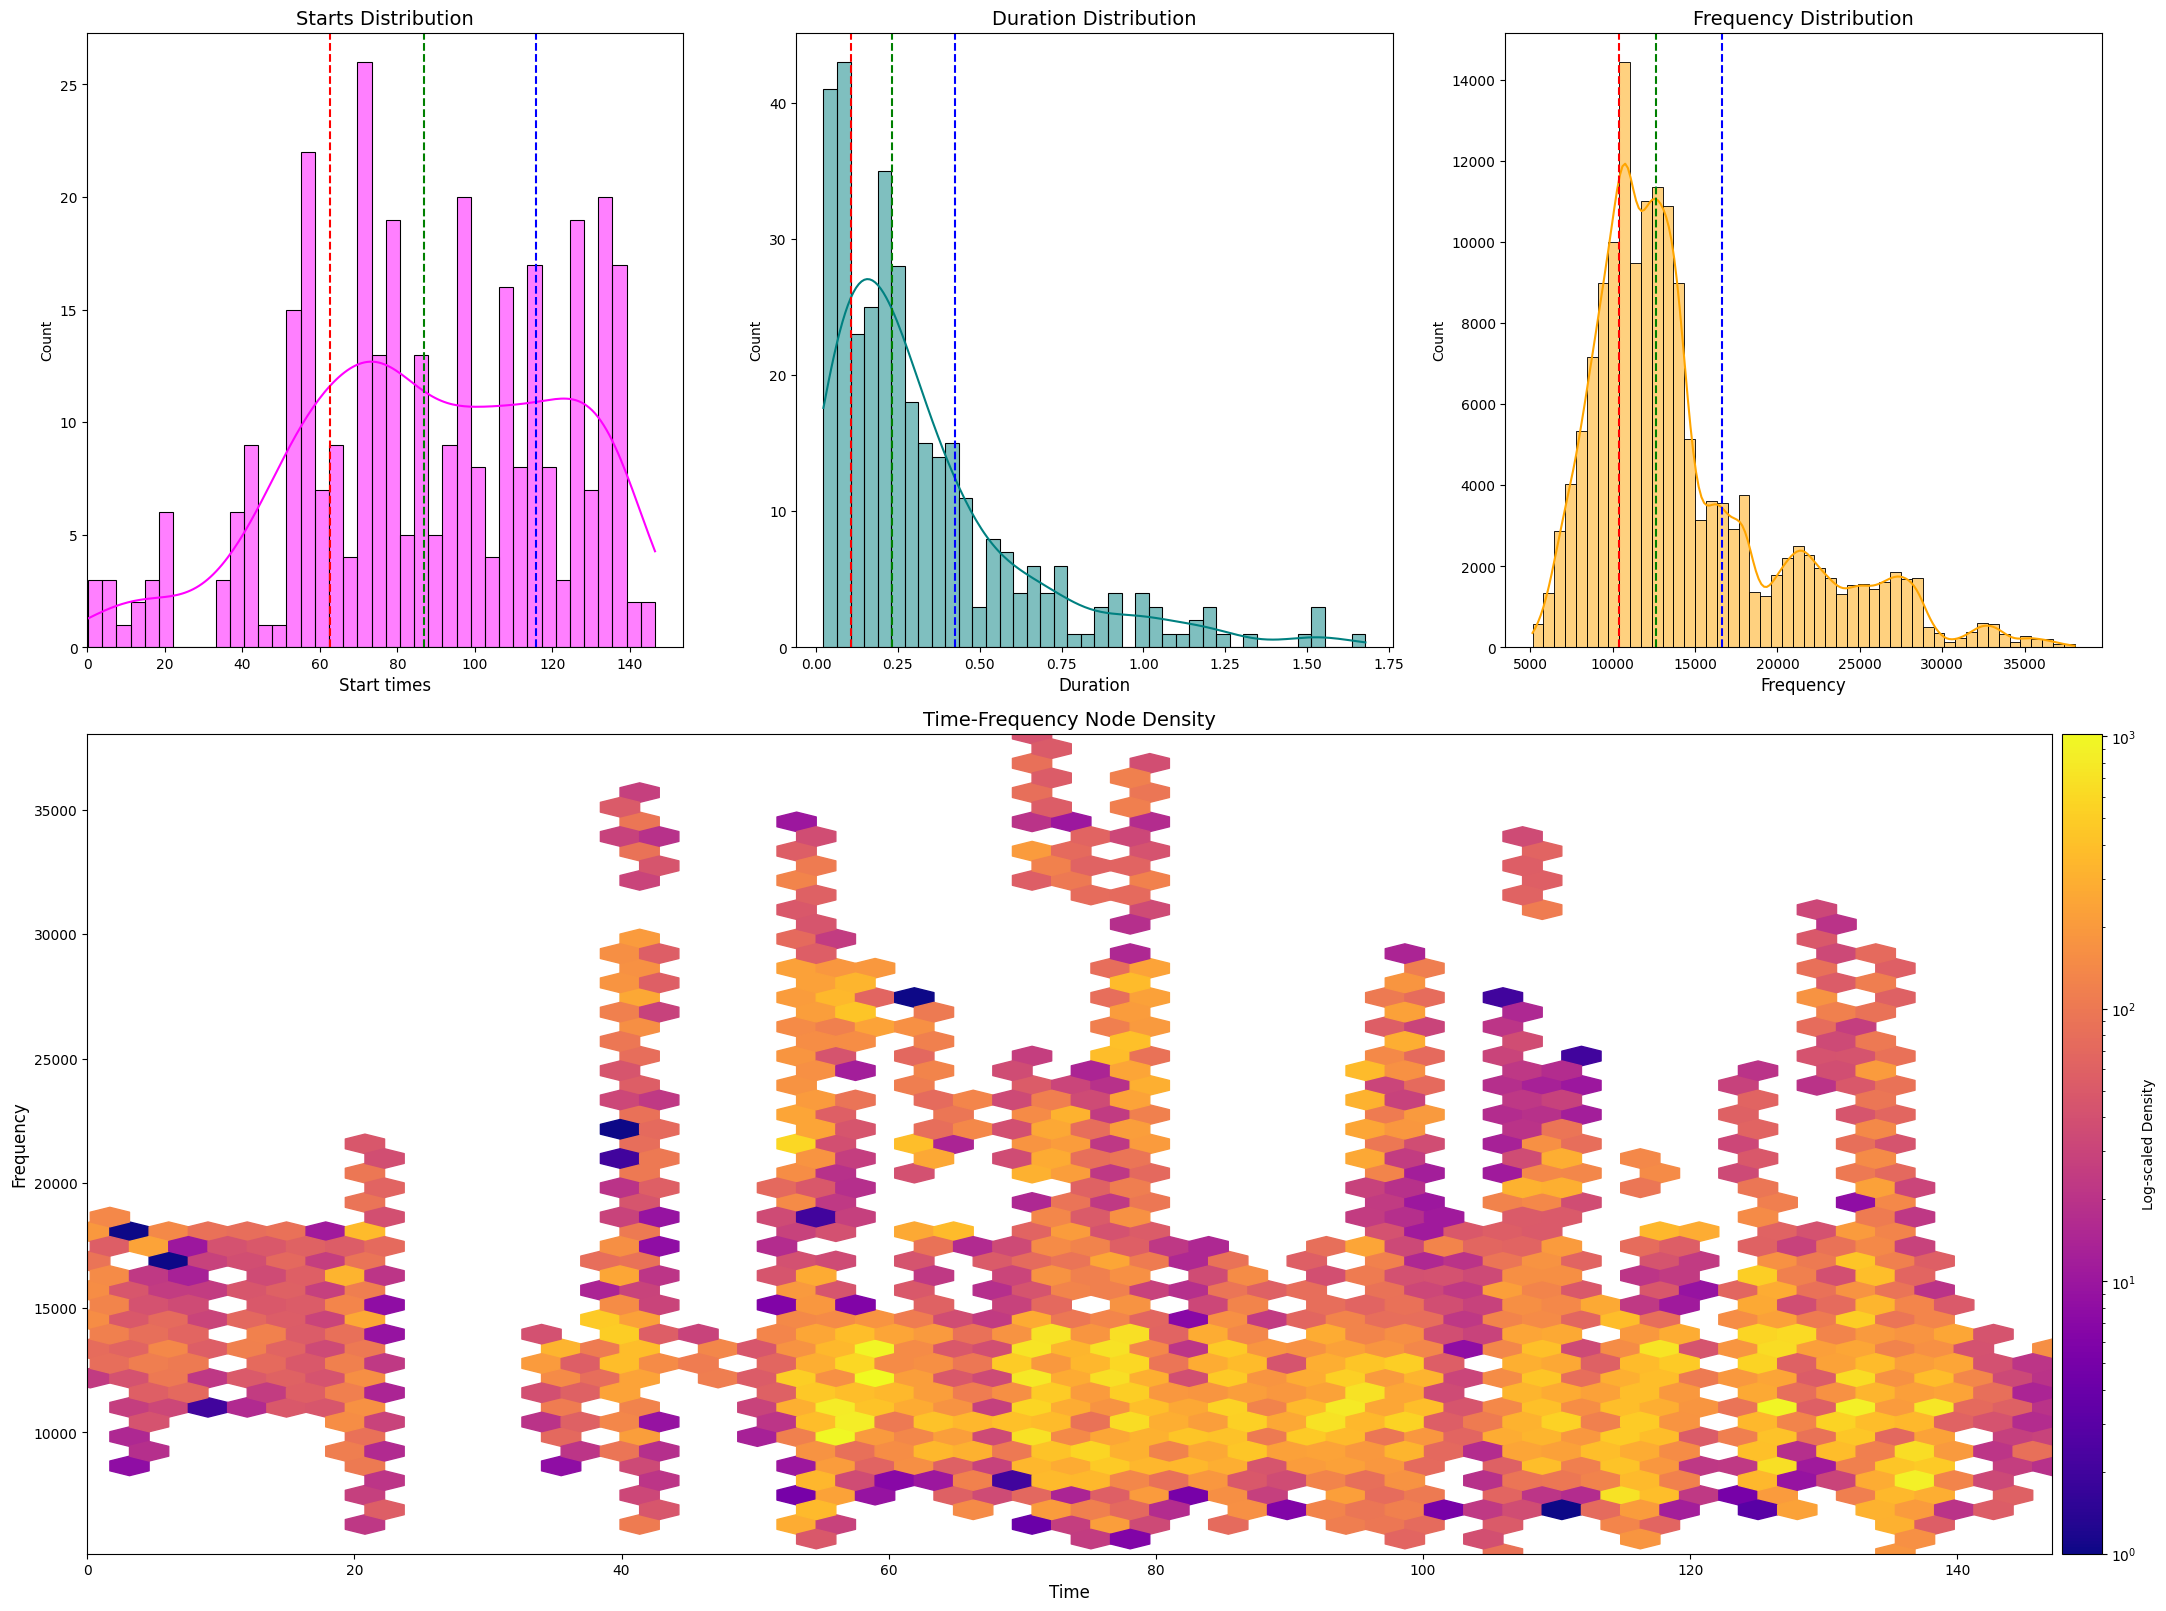

Loaded 135 annotated whistles from Qx-Dc-SC03-TAT09-060516-171606.bin
Minimum time: 35.14925036231884
Maximum time: 233.8888059178744
Minimum frequency: 5630.360205831898
low quartile frequency: 10369.009282769302
high quartile frequency: 13546.810273726953
Maximum frequency: 23280.445969125212
Minimum duration: 0.0173913043478251
low quartile duration: 0.09420289855071928
high quartile duration: 0.3855072463768039
Maximum duration: 1.547826086956519
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


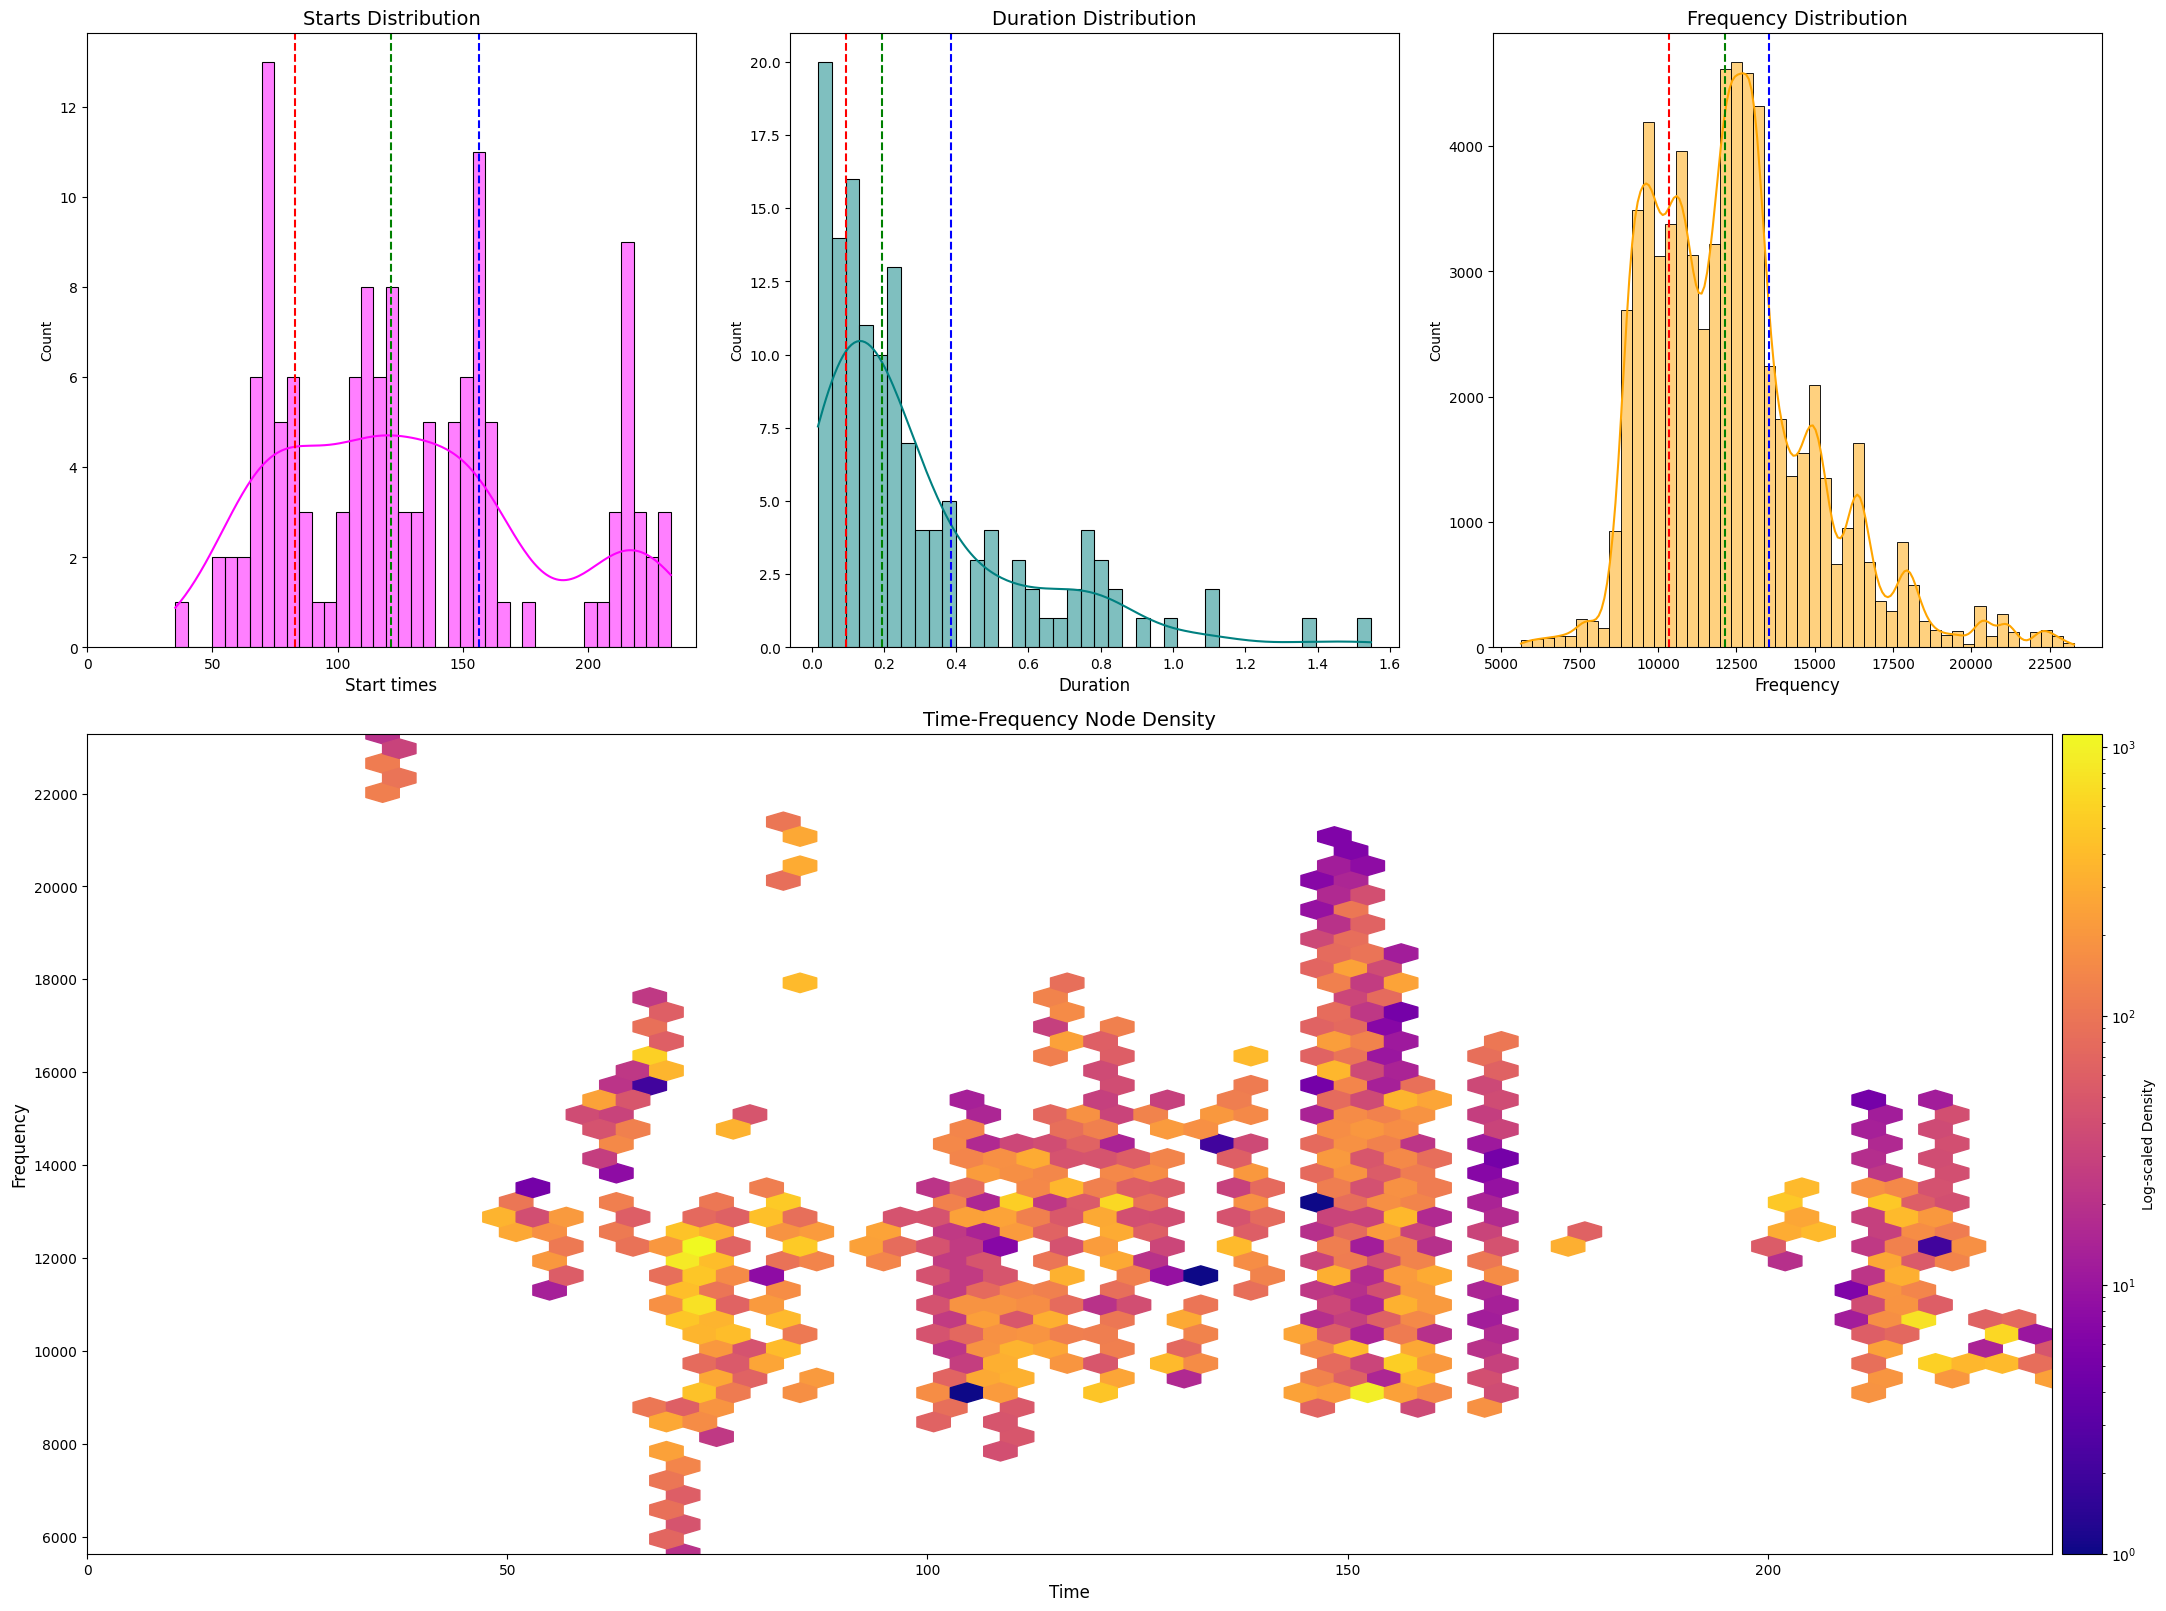

Loaded 152 annotated whistles from Qx-Tt-SCI0608-N1-060814-121518.bin
Minimum time: 11.229953125000002
Maximum time: 253.1549377362454
Minimum frequency: 5125.0
low quartile frequency: 12361.851697281367
high quartile frequency: 30204.502954000054
Maximum frequency: 49851.32158590308
Minimum duration: 0.006906077348066475
low quartile duration: 0.10963397790055485
high quartile duration: 0.48977168969031304
Maximum duration: 1.4991521650552286
trajectory length < 2: 0
trajectory length < 5: 0
trajectory length < 10: 0


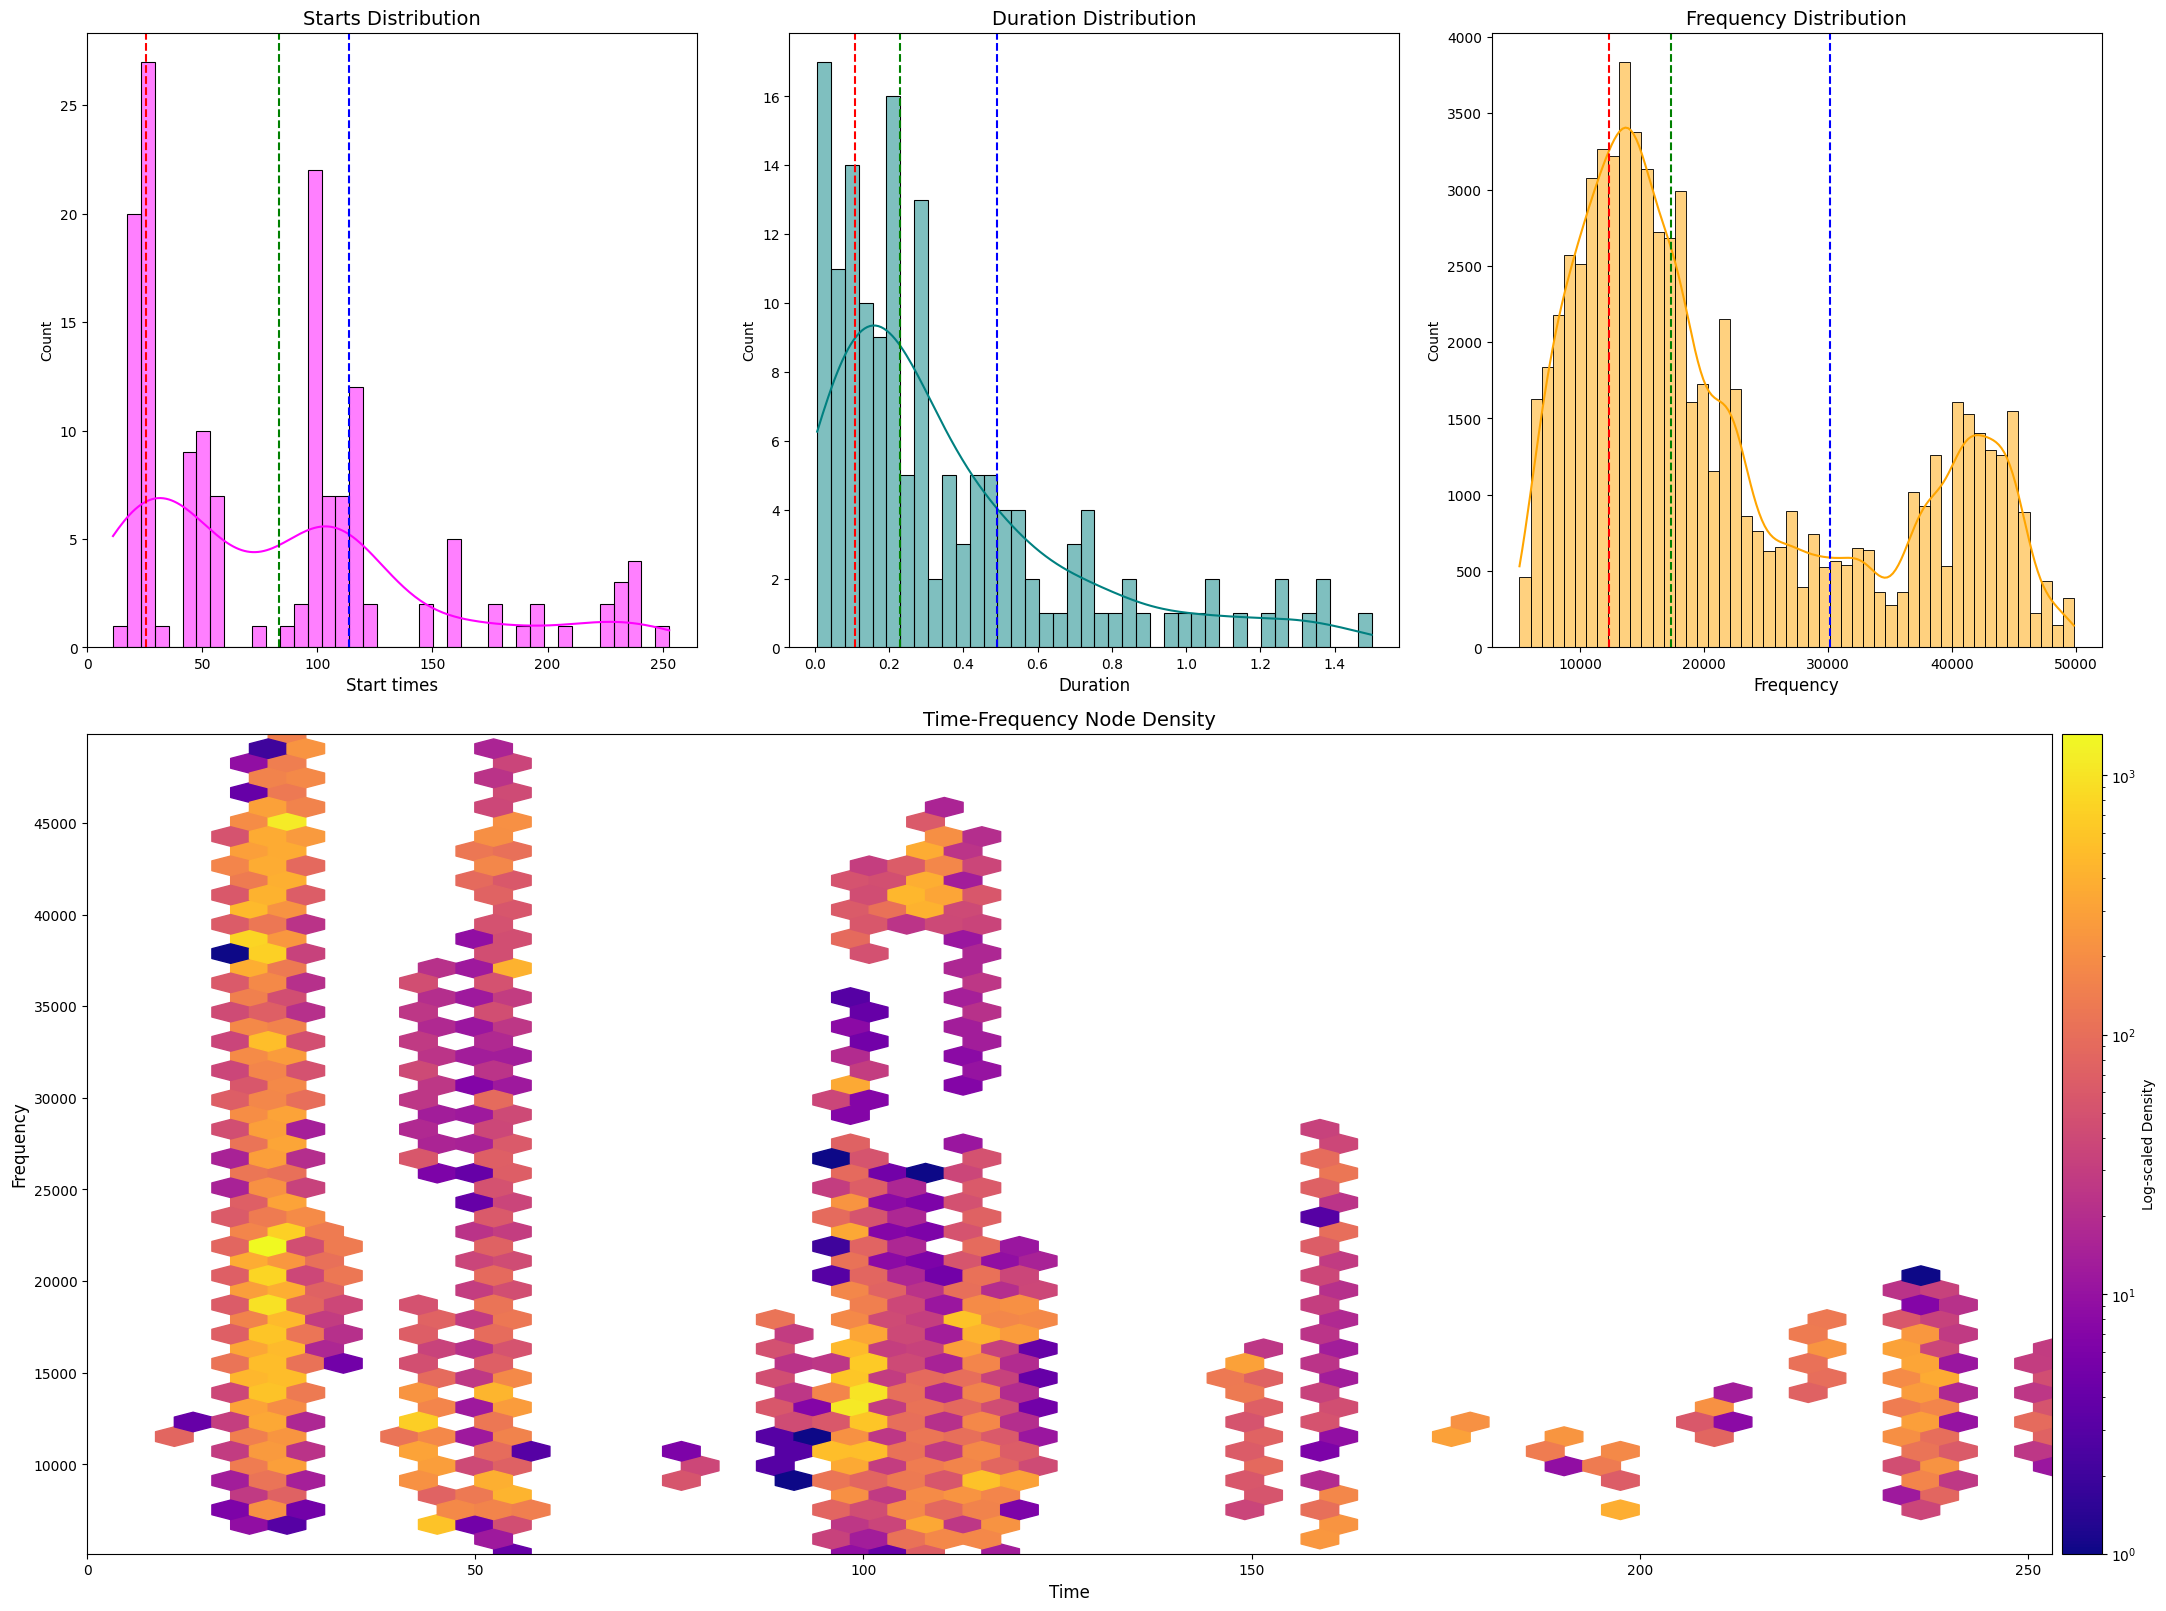

In [23]:
with open('/home/xzhang3906/Desktop/projects/whistle_prompter/data/meta.json') as f:
    meta = json.load(f)
for split, stems in meta['data'].items():
    print(f'Processing {split} data')
    for stem in stems:
        bin_file = Path(f'/home/xzhang3906/Desktop/projects/whistle_prompter/data/raw_anno/{stem}.bin')
        annos = utils.load_annotation(bin_file)
        res = whistle_stats(annos)
        plot_whistle_stats(res)